In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import cartopy.crs as ccrs
import cartopy.feature as cfeature
pd.set_option('display.max_columns', None)

# Metadata

#### Attribute Description
- carID - An attribute that contains an identifier for each car.
- Brand - The car’s main brand (e.g. Ford, Toyota).
- model - The car model.
- year - The year of Registration of the Car.
- mileage - The total reported distance travelled by the car (in miles).
- tax - The amount of road tax (in £) that, in 2020, was applicable to the car in question. 
- fuelType - Type of Fuel used by the car (Diesel, Petrol, Hybrid, Electric).
- mpg - Average Miles per Gallon.
- engineSize - Size of Engine in liters (Cubic Decimeters).
- paintQuality% - The mechanic’s assessment of the cars’ overall paint quality and hull integrity (filled by the mechanic during evaluation). 
- previousOwners - Number of previous registered owners of the vehicle.
- hasDamage - Boolean marker filled by the seller at the time of registration stating whether the car is damaged or not.
- price - The car’s price when purchased by Cars 4 You (in £).

# Reading the Data

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

# 1. Geral Analysis

In [3]:
df_train

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75968,37194,Mercedes,C Class,2015.0,13498,Manual,14480.0,etrol,125.0,53.300000,2.0,78.0,0.000000,0.0
75969,6265,Audi,Q3,2013.0,12495,Semi-Auto,52134.0,Diesel,200.0,47.900000,2.0,38.0,2.000000,0.0
75970,54886,Toyota,Aygo,2017.0,8399,Automatic,11304.0,Petrol,145.0,67.000000,1.0,57.0,3.000000,0.0
75971,860,Audi,Q3,2015.0,12990,Manual,69072.0,iesel,125.0,60.100000,2.0,74.0,2.000000,0.0


#### First Insights
- The Data Set has 75973 rows and 14 clomuns.
- Transmission contains incorrect values such as "anual" that should be "Manual".
- FuelType contains typos like "etrol", "iesel", "Petro" that should be corrected to "Petrol" and "Diesel".
- Tax column contains missing (NaN) values.
- PreviousOwners includes negative values which are impossible.

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74456 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    74451 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        74462 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


#### Info() Obsevations
- All columns contain missing values except for carID and price.
- Year is stored as a float but should be an integer (int).
- Mileage is stored as a float but should be an integer (int).
- PreviousOwners is stored as a float but should be an integer (int).
- HasDamage is stored as a float but should be a boolean (bool).

In [5]:
df_train.describe()

,carID,year,price,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
count,75973.000000,74482.000000,75973.000000,74510.000000,68069.000000,68047.000000,74457.000000,74449.000000,74423.000000,74425.0
mean,37986.000000,2017.096611,16881.889553,23004.184088,120.329078,55.152666,1.660136,64.590667,1.994580,0.0
std,21931.660338,2.208704,9736.926322,22129.788366,65.521176,16.497837,0.573462,21.021065,1.472981,0.0
min,0.000000,1970.000000,450.000000,-58540.574478,-91.121630,-43.421768,-0.103493,1.638913,-2.345650,0.0
25%,18993.000000,2016.000000,10200.000000,7423.250000,125.000000,46.300000,1.200000,47.000000,1.000000,0.0
50%,37986.000000,2017.000000,14699.000000,17300.000000,145.000000,54.300000,1.600000,65.000000,2.000000,0.0
75%,56979.000000,2019.000000,20950.000000,32427.500000,145.000000,62.800000,2.000000,82.000000,3.000000,0.0
max,75972.000000,2024.121759,159999.000000,323000.000000,580.000000,470.800000,6.600000,125.594308,6.258371,0.0


#### describe() Observations
- Mileage has negative values (min is -58,540.57) which are impossible.
- Tax has negative values (min is -91.12) which are impossible.
- MPG has negative values (min is -43.42) which are invalid.
- EngineSize has negative values (min is -0.10) which are invalid.
- PaintQuality% has values above 100% and negatives which represent incorrect data.
- PreviousOwners has negative values (min is - i2.35) which are invalid.
- Year maximum is 2024.12 which is likely a typo or float conversion error.

# 2. Univariate Analysis

Since each variable has its own issues, the best approach is a systematic, feature-by-feature analysis.

## 2.1. CarID

Checking Nans.

In [6]:
df_train['carID'].isna().sum()

0

Checking Nans.

Cheking duplicates IDs.

In [7]:
df_train['carID'].duplicated().sum()

0

In [8]:
df_train['carID'].nunique()

75973

#### CarID Observations
- No Nan values found for CarID.
- No CarID duplicates found.
- No issues for carID.

## 2.2. Brand

Checking Nans.

In [9]:
df_train['Brand'].isna().sum()

1521

Checking Inconsistences.

In [10]:
df_train['Brand'].unique()

array(['VW', 'Toyota', 'Audi', 'Ford', 'BMW', 'Skoda', 'Opel', 'Mercedes',
       'FOR', 'mercedes', 'Hyundai', 'w', 'ord', 'MW', 'bmw', nan,
       'yundai', 'BM', 'Toyot', 'udi', 'Ope', 'AUDI', 'V', 'opel', 'pel',
       'For', 'pe', 'Mercede', 'audi', 'MERCEDES', 'OPEL', 'koda', 'FORD',
       'Hyunda', 'W', 'Aud', 'vw', 'hyundai', 'skoda', 'ford', 'TOYOTA',
       'ercedes', 'oyota', 'toyota', 'SKODA', 'Skod', 'HYUNDAI', 'kod',
       'v', 'for', 'SKOD', 'aud', 'KODA', 'PEL', 'yunda', 'or', 'UDI',
       'OYOTA', 'HYUNDA', 'mw', 'OPE', 'mercede', 'ERCEDES', 'ercede',
       'TOYOT', 'MERCEDE', 'ORD', 'ud', 'ope', 'AUD', 'hyunda', 'skod',
       'toyot'], dtype=object)

The 'Brand' column has many inconsistencies in uppercase/lowercase letters and spelling errors.

In [11]:
# Normalizing all strings to lowercase.
df_train['Brand'] = df_train['Brand'].str.lower()

In [12]:
# Cheking all the unique values of 'Brand'.
df_train['Brand'].unique()

array(['vw', 'toyota', 'audi', 'ford', 'bmw', 'skoda', 'opel', 'mercedes',
       'for', 'hyundai', 'w', 'ord', 'mw', nan, 'yundai', 'bm', 'toyot',
       'udi', 'ope', 'v', 'pel', 'pe', 'mercede', 'koda', 'hyunda', 'aud',
       'ercedes', 'oyota', 'skod', 'kod', 'yunda', 'or', 'ercede', 'ud'],
      dtype=object)

In [13]:
# Cheking all the unique values of 'Brand' sorted alphabetically.
sorted(df_train['Brand'].dropna().unique())

['aud',
 'audi',
 'bm',
 'bmw',
 'ercede',
 'ercedes',
 'for',
 'ford',
 'hyunda',
 'hyundai',
 'kod',
 'koda',
 'mercede',
 'mercedes',
 'mw',
 'ope',
 'opel',
 'or',
 'ord',
 'oyota',
 'pe',
 'pel',
 'skod',
 'skoda',
 'toyot',
 'toyota',
 'ud',
 'udi',
 'v',
 'vw',
 'w',
 'yunda',
 'yundai']

The errors were identified and will be stored in a dictionary. Each one will be manually reviewed and corrected one by one.

In [14]:
# mapping dictionary (alphabetically sorted by keys.
brand_mapping = {
    'aud': 'audi',
    'bm': 'bmw',
    'ercede': 'mercedes',
    'ercedes': 'mercedes',
    'for': 'ford',
    'hyunda': 'hyundai',
    'koda': 'skoda',
    'kod': 'skoda',
    'mercede': 'mercedes',
    'mw': 'bmw',
    'or': 'ford',
    'ord': 'ford',
    'ope': 'opel',
    'pel': 'opel',
    'pe': 'opel',
    'skod': 'skoda',
    'toyot': 'toyota',
    'ud': 'hyundai',
    'udi': 'audi',
    'v': 'vw',
    'w': 'vw', # 'w' could be'bmw' and not just 'vw'.
    'yunda': 'hyundai',
    'yundai': 'hyundai',
    'oyota': 'toyota'
}

# Apply the mapping to correct brand names.
df_train['Brand'] = df_train['Brand'].map(brand_mapping).fillna(df_train['Brand'])

In [15]:
# Ckeking the result of mapping.
df_train['Brand'].unique()

array(['vw', 'toyota', 'audi', 'ford', 'bmw', 'skoda', 'opel', 'mercedes',
       'hyundai', nan], dtype=object)

Visualizing Brand on a Countplot.

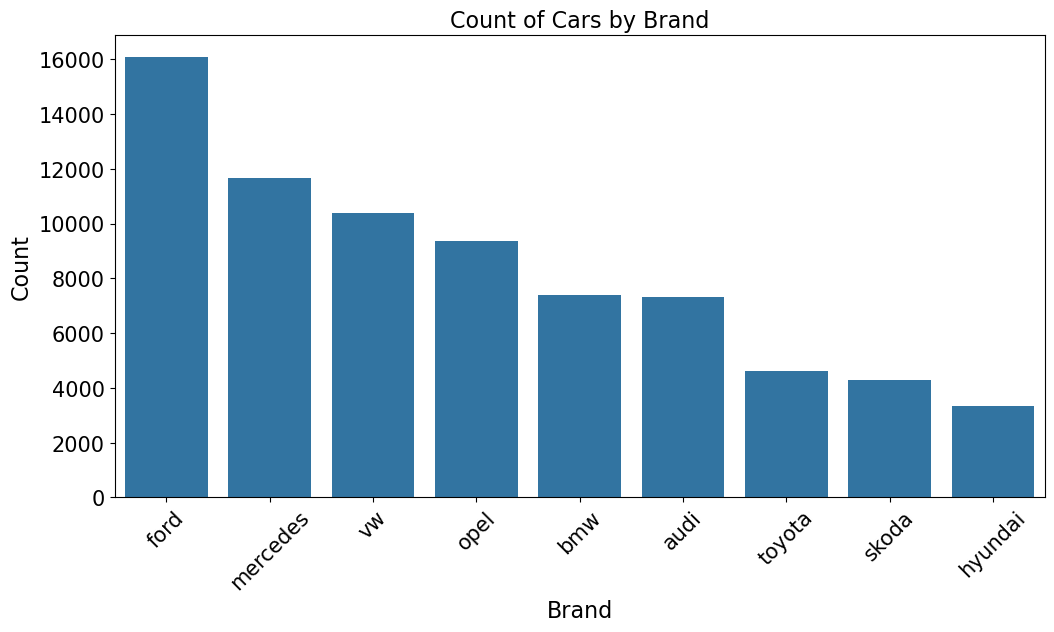

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_train, x='Brand', order=df_train['Brand'].value_counts().index)

plt.xticks(rotation=45, fontsize=15) 
plt.yticks(fontsize=15)               
plt.title('Count of Cars by Brand', fontsize=16) 
plt.xlabel('Brand', fontsize=16)     
plt.ylabel('Count', fontsize=16)     
plt.show()

#### Brand Observations
- Missing values: 1,521.
- Data cleaning: inconsistencies in uppercase/lowercase and spelling errors corrected.
- Most frequent brands: Ford is the most common, followed by Mercedes and VW.

## 2.3. Model

Cheking Nans.

In [17]:
df_train['model'].isna().sum()

1517

Checking Inconsistences.

In [18]:
# Checking the unique values of the 'model column.
df_train['model'].dropna().unique()

array([' Golf', ' Yaris', ' Q2', ' FIESTA', ' 2 Series', '3 Series',
       ' A3', ' Octavia', ' Passat', ' Focus', ' Insignia', ' A Clas',
       ' Q3', ' Fabia', ' A Class', ' Ka+', ' 3 Series', ' GLC Class',
       ' I30', ' C Class', ' Polo', ' E Class', ' C Clas', ' Q5', ' Up',
       ' Fiesta', ' C-HR', ' Mokka X', ' Corsa', ' Astra', ' TT',
       ' 5 Series', ' Aygo', ' 4 Series', ' SLK', ' Viva', ' T-Roc',
       'Focus', ' EcoSport', ' Tucson', ' EcoSpor', ' X-CLASS',
       ' CL Class', ' IX20', ' i20', ' Rapid', ' a1', ' Auris', ' sharan',
       ' I20', ' Adam', ' X3', ' A8', ' GLS Class', ' B-MAX', ' A4',
       ' Kona', ' I10', ' A1', ' Mokka', ' fiesta', ' S-MAX', ' X2',
       ' Crossland X', ' Tiguan', ' A5', ' GLE Class', ' C CLASS',
       ' mokka x', ' Zafira', ' Ioniq', ' A6', ' Mondeo', ' Yeti Outdoor',
       ' X1', 'POLO', ' INSIGNIA', ' Scala', ' S Class', ' 1 Series',
       ' Kamiq', ' Kuga', ' Tourneo Connect', ' Q7', ' GLA Class',
       ' Arteon', ' polo'

Several typing errors are identified, such as missing letters and extra spaces at the beginning of strings.

In [19]:
# Checking the unique values of the 'model' column in alphabetical order.
sorted(df_train['model'].dropna().unique())[:50] # Checking the first 50 values.

[' 1 SERIE',
 ' 1 SERIES',
 ' 1 Serie',
 ' 1 Series',
 ' 1 serie',
 ' 1 series',
 ' 2 SERIES',
 ' 2 Serie',
 ' 2 Series',
 ' 2 serie',
 ' 2 series',
 ' 3 SERIES',
 ' 3 Serie',
 ' 3 Series',
 ' 3 serie',
 ' 3 series',
 ' 4 SERIES',
 ' 4 Serie',
 ' 4 Series',
 ' 4 serie',
 ' 4 series',
 ' 5 SERIES',
 ' 5 Serie',
 ' 5 Series',
 ' 5 series',
 ' 6 SERIES',
 ' 6 Serie',
 ' 6 Series',
 ' 6 series',
 ' 7 SERIES',
 ' 7 Serie',
 ' 7 Series',
 ' 7 series',
 ' 8 SERIES',
 ' 8 Serie',
 ' 8 Series',
 ' 8 series',
 ' A',
 ' A CLASS',
 ' A Clas',
 ' A Class',
 ' A1',
 ' A2',
 ' A3',
 ' A4',
 ' A5',
 ' A6',
 ' A7',
 ' A8',
 ' ADAM']

Since some values are written in lowercase and others in uppercase for the same car model, we will convert everything to uppercase to simplify the analysis.

In [20]:
df_train['model'] = df_train['model'].str.upper()

In [21]:
# Checking the 'model' column with values sorted alphabetically and all strings in uppercase.
sorted(df_train['model'].dropna().unique())

[' 1 SERIE',
 ' 1 SERIES',
 ' 2 SERIE',
 ' 2 SERIES',
 ' 3 SERIE',
 ' 3 SERIES',
 ' 4 SERIE',
 ' 4 SERIES',
 ' 5 SERIE',
 ' 5 SERIES',
 ' 6 SERIE',
 ' 6 SERIES',
 ' 7 SERIE',
 ' 7 SERIES',
 ' 8 SERIE',
 ' 8 SERIES',
 ' A',
 ' A CLAS',
 ' A CLASS',
 ' A1',
 ' A2',
 ' A3',
 ' A4',
 ' A5',
 ' A6',
 ' A7',
 ' A8',
 ' ACCENT',
 ' ADA',
 ' ADAM',
 ' AGILA',
 ' AMARO',
 ' AMAROK',
 ' AMPERA',
 ' ANTARA',
 ' ARTEO',
 ' ARTEON',
 ' ASTR',
 ' ASTRA',
 ' AURI',
 ' AURIS',
 ' AVENSIS',
 ' AYG',
 ' AYGO',
 ' B CLAS',
 ' B CLASS',
 ' B-MA',
 ' B-MAX',
 ' BEETL',
 ' BEETLE',
 ' C CLAS',
 ' C CLASS',
 ' C-H',
 ' C-HR',
 ' C-MA',
 ' C-MAX',
 ' CADDY',
 ' CADDY LIFE',
 ' CADDY MAXI',
 ' CADDY MAXI LIF',
 ' CADDY MAXI LIFE',
 ' CALIFORNIA',
 ' CAMRY',
 ' CARAVELL',
 ' CARAVELLE',
 ' CASCADA',
 ' CC',
 ' CITIG',
 ' CITIGO',
 ' CL CLAS',
 ' CL CLASS',
 ' CLA CLASS',
 ' CLC CLASS',
 ' CLK',
 ' CLS CLAS',
 ' CLS CLASS',
 ' COMBO LIF',
 ' COMBO LIFE',
 ' COROLL',
 ' COROLLA',
 ' CORS',
 ' CORSA',
 ' CROSSLAND

Building a function 'remove_leading_spaces' to remove initial empty spaces.

In [22]:
# Function to remove leading space if it exists.
def remove_leading_space(s):
    if isinstance(s, str) and s.startswith(' '):
        return s[1:]  # remove the first character.
    return s

# Apply the function to the 'model' column.
df_train['model'] = df_train['model'].apply(remove_leading_space)

In [23]:
# Show the ordered unique values of model column after removing leading spaces.
sorted(df_train['model'].dropna().unique())

['1 SERIE',
 '1 SERIES',
 '2 SERIE',
 '2 SERIES',
 '200',
 '220',
 '230',
 '3 SERIE',
 '3 SERIES',
 '4 SERIE',
 '4 SERIES',
 '5 SERIE',
 '5 SERIES',
 '6 SERIE',
 '6 SERIES',
 '7 SERIE',
 '7 SERIES',
 '8 SERIE',
 '8 SERIES',
 'A',
 'A CLAS',
 'A CLASS',
 'A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'ACCENT',
 'ADA',
 'ADAM',
 'AGILA',
 'AMARO',
 'AMAROK',
 'AMPERA',
 'ANTARA',
 'ARTEO',
 'ARTEON',
 'ASTR',
 'ASTRA',
 'AURI',
 'AURIS',
 'AVENSIS',
 'AYG',
 'AYGO',
 'B CLAS',
 'B CLASS',
 'B-MA',
 'B-MAX',
 'BEETL',
 'BEETLE',
 'C CLAS',
 'C CLASS',
 'C-H',
 'C-HR',
 'C-MA',
 'C-MAX',
 'CADDY',
 'CADDY LIFE',
 'CADDY MAXI',
 'CADDY MAXI LIF',
 'CADDY MAXI LIFE',
 'CALIFORNIA',
 'CAMRY',
 'CARAVELL',
 'CARAVELLE',
 'CASCADA',
 'CC',
 'CITIG',
 'CITIGO',
 'CL CLAS',
 'CL CLASS',
 'CLA CLASS',
 'CLC CLASS',
 'CLK',
 'CLS CLAS',
 'CLS CLASS',
 'COMBO LIF',
 'COMBO LIFE',
 'COROLL',
 'COROLLA',
 'CORS',
 'CORSA',
 'CROSSLAND ',
 'CROSSLAND X',
 'E CLAS',
 'E CLASS',
 'ECOSPOR',
 'EC

Creating a dictionary named Replacements that maps all incorrect or inconsistent entries in the 'model' column to their correct versions, including marking invalid or unclear entries as missing (np.nan).

In [24]:
Replacements = {
    '1 SERIE': '1 SERIES',
    '2 SERIE': '2 SERIES',
    '3 SERIE': '3 SERIES',
    '4 SERIE': '4 SERIES',
    '5 SERIE': '5 SERIES',
    '6 SERIE': '6 SERIES',
    '7 SERIE': '7 SERIES',
    '8 SERIE': '8 SERIES',
    'A': np.nan,
    'A CLAS': 'A CLASS',
    'ADA': 'ADAM',
    'AMARO': 'AMAROK',
    'ARTEO': 'ARTEON',
    'ASTR': 'ASTRA',
    'AURI': 'AURIS',
    'AYG': 'AYGO',
    'B CLAS': 'B CLASS',
    'B-MA': 'B-MAX',
    'BEETL': 'BEETLE',
    'C CLAS': 'C CLASS',
    'C-H': 'C-HR',
    'C-MA': 'C-MAX',
    'CADDY MAXI LIF': 'CADDY MAXI LIFE',
    'CARAVELL': 'CARAVELLE',
    'CITIG': 'CITIGO',
    'CL CLAS': 'CL CLASS',
    'CLS CLAS': 'CLS CLASS',
    'COMBO LIF': 'COMBO LIFE',
    'COROLL': 'COROLLA',
    'CORS': 'CORSA',
    'E CLAS': 'E CLASS',
    'ECOSPOR': 'ECOSPORT',
    'EDG': 'EDGE',
    'FABI': 'FABIA',
    'FIEST': 'FIESTA',
    'FOCU': 'FOCUS',
    'GALAX': 'GALAXY',
    'GLE CLAS': 'GLE CLASS',
    'GLA CLAS': 'GLA CLASS',
    'GLC CLAS': 'GLC CLASS',
    'GLS CLAS': 'GLS CLASS',
    'GOL': 'GOLF',
    'GOLF S': 'GOLF SV',
    'GRAND C-MA': 'GRAND C-MAX',
    'GRAND TOURNEO CONNEC': 'GRAND TOURNEO CONNECT',
    'HILU': 'HILUX',
    'I': np.nan,
    'I80': np.nan,
    'IONI': 'IONIQ',
    'INSIGNI': 'INSIGNIA',
    'K': 'KA',
    'KAMI': 'KAMIQ',
    'KARO': 'KAROQ',
    'KA+': 'KA',
    'KODIA': 'KODIAQ',
    'KON': 'KONA',
    'KUG': 'KUGA',
    'LAND CRUISE': 'LAND CRUISER',
    'M': np.nan,
    'M CLAS': 'M CLASS',
    'MERIV': 'MERIVA',
    'MOKK': 'MOKKA', 
    'MONDE': 'MONDEO',
    'OCTAVI': 'OCTAVIA',
    'PASSA': 'PASSAT',
    'POL': 'POLO',
    'Q': np.nan,
    'R-ROC': 'T-ROC',
    'RAPI': 'RAPID',
    'RAV': 'RAV4',
    'ROOMSTE': 'ROOMSTER',
    'RS': np.nan,
    'S CLAS': 'S CLASS',
    'SUPER': 'SUPERB',
    'S-MA': 'S-MAX',
    'SANTA F': 'SANTA FE',
    'SCAL': 'SCALA',
    'SCIROCC': 'SCIROCCO',
    'SHARA': 'SHARAN',
    'SL': 'SLk',
    'SL CLAS': 'SL CLASS',
    'T': np.nan,
    'T-CROS': 'T-CROSS',
    'T-RO': 'R-ROC',
    'TIGUA': 'TIGUAN',
    'TIGUAN ALLSPAC': 'TIGUAN ALLSPACE',
    'TOURA': 'TOURAN',
    'TOUARE': 'TOUAREG',
    'TOURNEO CUSTO': 'TOURNEO CUSTOM',
    'TUCSO': 'TUCSON',
    'U': 'UP',
    'URBAN CRUISE': 'URBAN CRUISER',
    'V CLAS': 'V CLASS',
    'VELOSTE': 'VELOSTER',
    'VERS': 'VERSA',
    'VIV': 'VIVA',
    'VIV': 'VIVA',
    'X': np.nan,
    'X-CLAS': 'X CLASS',
    'X-CLASS': 'X CLASS',
    'YARI': 'YARIS',
    'YET': 'YETI',
    'YETI OUTDOO': 'YETI OUTDOOR',
    'ZAFIR': 'ZAFIRA',
    'ZAFIRA TOURE': 'ZAFIRA TOURER',
    '200': np.nan,
    '220': np.nan,
    '230': np.nan
}


In [25]:
# Applying the dictionary of string replacements for all typing errors in 'model' column.
df_train['model'] = df_train['model'].replace(Replacements)

In [26]:
# Display the unique values of the 'model' column, sorted alphabetically, after correcting typing errors and removing leading spaces.
sorted(df_train['model'].dropna().unique())

['1 SERIES',
 '2 SERIES',
 '3 SERIES',
 '4 SERIES',
 '5 SERIES',
 '6 SERIES',
 '7 SERIES',
 '8 SERIES',
 'A CLASS',
 'A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'ACCENT',
 'ADAM',
 'AGILA',
 'AMAROK',
 'AMPERA',
 'ANTARA',
 'ARTEON',
 'ASTRA',
 'AURIS',
 'AVENSIS',
 'AYGO',
 'B CLASS',
 'B-MAX',
 'BEETLE',
 'C CLASS',
 'C-HR',
 'C-MAX',
 'CADDY',
 'CADDY LIFE',
 'CADDY MAXI',
 'CADDY MAXI LIFE',
 'CALIFORNIA',
 'CAMRY',
 'CARAVELLE',
 'CASCADA',
 'CC',
 'CITIGO',
 'CL CLASS',
 'CLA CLASS',
 'CLC CLASS',
 'CLK',
 'CLS CLASS',
 'COMBO LIFE',
 'COROLLA',
 'CORSA',
 'CROSSLAND ',
 'CROSSLAND X',
 'E CLASS',
 'ECOSPORT',
 'EDGE',
 'EOS',
 'ESCORT',
 'FABIA',
 'FIESTA',
 'FOCUS',
 'FOX',
 'FUSION',
 'G CLASS',
 'GALAXY',
 'GETZ',
 'GL CLASS',
 'GLA CLASS',
 'GLB CLASS',
 'GLC CLASS',
 'GLE CLASS',
 'GLS CLASS',
 'GOLF',
 'GOLF SV',
 'GRAND C-MAX',
 'GRAND TOURNEO CONNECT',
 'GRANDLAND ',
 'GRANDLAND X',
 'GT86',
 'GTC',
 'HILUX',
 'I1',
 'I10',
 'I2',
 'I20',
 'I3',
 'I30',
 'I40

In [27]:
# Checking the number of NaN values in the 'model' column after applying the replacements.
df_train['model'].isna().sum()

1709

After applying the replacement dictionary, 192 values in the model column were converted to NaN.

Visualizing the 20 most frequent car models on a count plot.

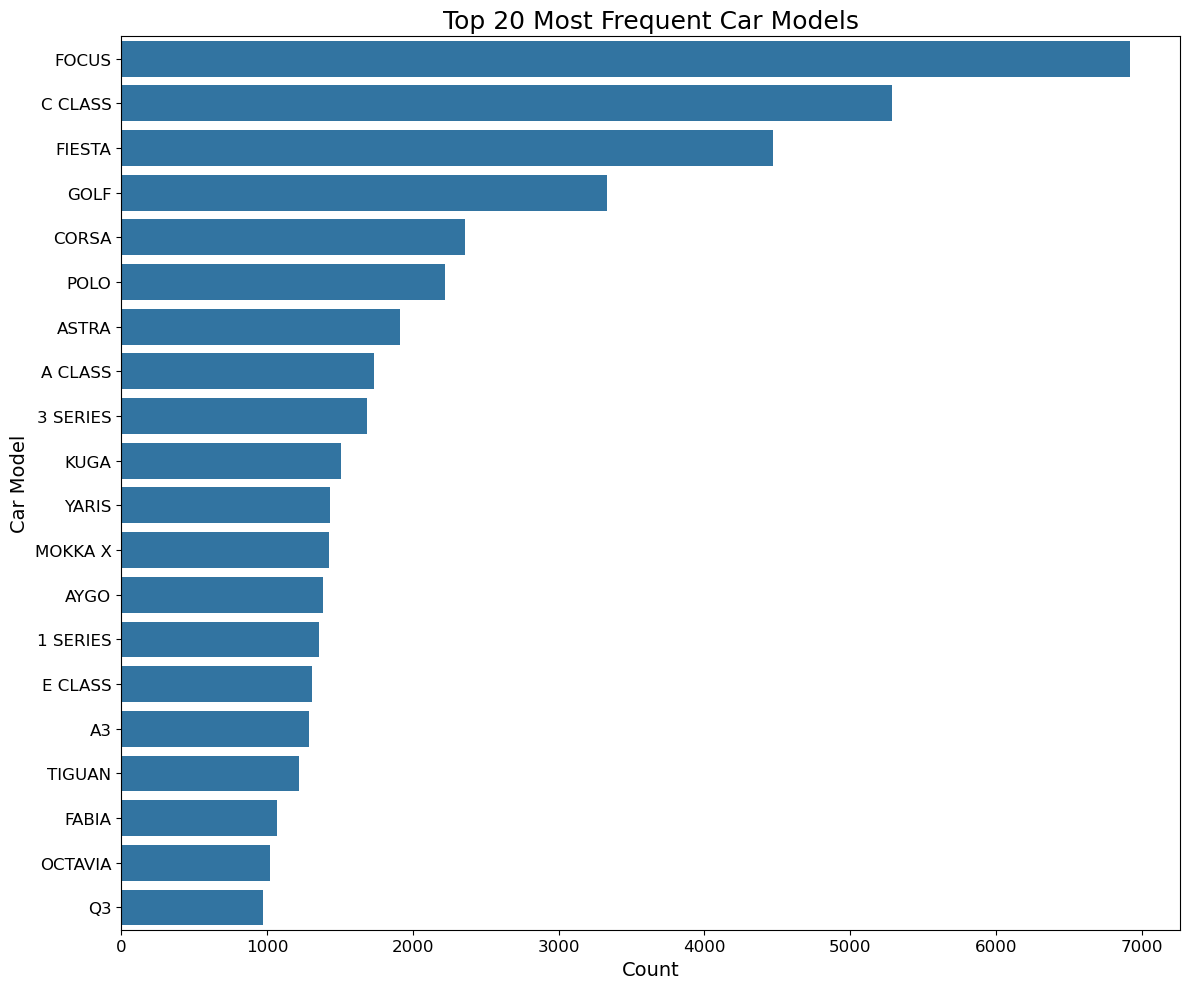

In [28]:
# Select the top 20 most frequent car models.
top_models = df_train['model'].value_counts().nlargest(20).index

plt.figure(figsize=(12, 10))

sns.countplot(
    y='model',
    data=df_train,
    order=top_models,
)

plt.title('Top 20 Most Frequent Car Models', fontsize=18)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Car Model', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

#### Model Observations
- Typing issues fixed: each value was meticulously evaluated and manually corrected, including removal of extra whitespace.
- NaN values: initially 1,517, now 1,709 after cleaning, due to 192 car models incorrectly entered and considered missing information.
- Most frequent models: visually, Focus is the most common, followed by C-Class and Fiesta.

## 2.4. Year

Cheking Nans.

In [29]:
df_train['year'].isna().sum()

1491

Checking Inconsistences.

In [30]:
df_train['year'].unique()

array([2016.        , 2019.        , 2018.        , 2014.        ,
       2017.        , 2020.        , 2013.        ,           nan,
       2015.        , 2023.36707842, 2011.        , 2012.        ,
       2023.1169636 , 2003.        , 2009.        , 2007.        ,
       2005.        , 2011.11118842, 2011.21085349, 2023.97731126,
       2004.        , 2010.        , 2010.56500919, 2008.        ,
       2024.12175905, 2006.        , 2023.60527574, 2023.38982198,
       2010.67696784, 2001.        , 2000.        , 2023.26798867,
       2010.26863473, 2010.37154646, 2002.        , 2022.69668507,
       2009.81675711, 2010.7464032 , 2012.69574039, 1996.        ,
       1998.        , 2022.87800554, 1970.        , 1999.        ,
       1997.        ])

These decimal places are probably caused by converting dates to floats. The safest fix is to round to the nearest whole number.

In [31]:
df_train['year'] = df_train['year'].apply(lambda x: int(round(x)) if pd.notnull(x) else np.nan)

In [32]:
df_train['year'].unique()

array([2016., 2019., 2018., 2014., 2017., 2020., 2013.,   nan, 2015.,
       2023., 2011., 2012., 2003., 2009., 2007., 2005., 2024., 2004.,
       2010., 2008., 2006., 2001., 2000., 2002., 1996., 1998., 1970.,
       1999., 1997.])

Now we can convert the dtype float to int.

In [33]:
df_train['year'] = df_train['year'].astype('Int64')

In [34]:
df_train['year'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 75973 entries, 0 to 75972
Series name: year
Non-Null Count  Dtype
--------------  -----
74482 non-null  Int64
dtypes: Int64(1)
memory usage: 667.9 KB


Visualizing year on a histogram and boxplot.

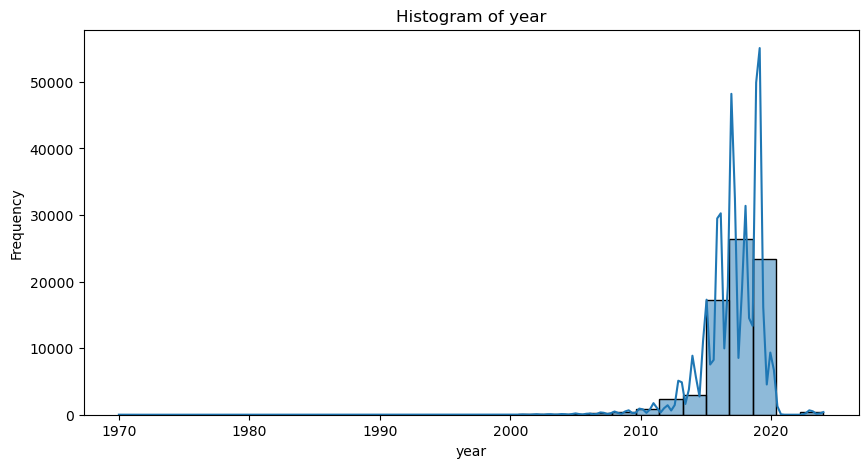

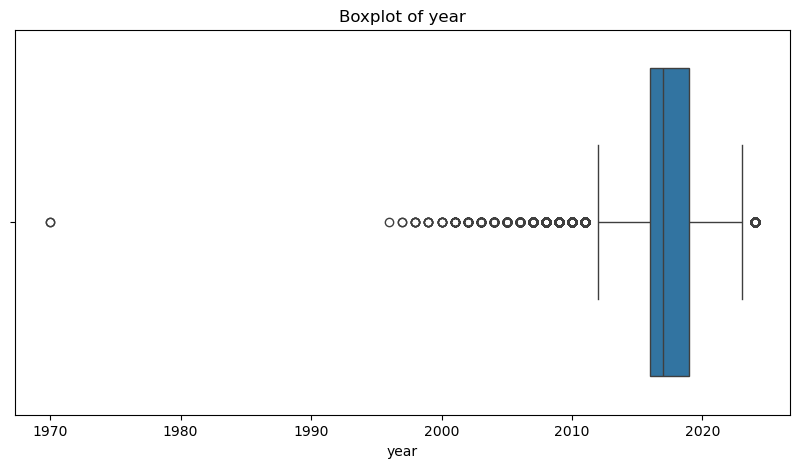

In [35]:
# Histogram.
plt.figure(figsize=(10,5))
sns.histplot(df_train['year'], bins=30, kde=True) 
plt.title('Histogram of year')
plt.xlabel('year')
plt.ylabel('Frequency')
plt.show()

# Boxplot.
plt.figure(figsize=(10,5))
sns.boxplot(x=df_train['year'])
plt.title('Boxplot of year')
plt.xlabel('year')
plt.show()

#### Year Observations
- Initial NaNs: 1,491.
- Years with decimals were rounded to the nearest integer.
- dtype converted to int.
- Data is mostly recent (2015–2020).
- Older years (before 2010) are outliers – consider whether to remove them.

## 2.5. Mileage

Cheking Nan Values.

In [36]:
df_train['mileage'].isna().sum()

1463

Checking inconsistencies.

In [37]:
df_train['mileage'].head(30)

0      28421.000000
1       4589.000000
2       3624.000000
3       9102.000000
4       1000.000000
5     101153.348285
6      21396.000000
7     116750.000000
8      30339.000000
9      10700.000000
10     21123.000000
11      1000.000000
12     26360.000000
13     14378.000000
14      9500.000000
15      7057.000000
16     15472.000000
17      9981.000000
18     20112.000000
19     30808.000000
20     51236.000000
21      1000.000000
22     29925.000000
23       922.000000
24     64739.000000
25      9463.000000
26     45000.000000
27      1255.000000
28     42000.000000
29      7295.000000
Name: mileage, dtype: float64

It doesn’t make sense to have so many decimal places when we’re talking about a vehicle’s mileage. The most appropriate approach is to convert these numbers to the nearest integers by changing the dtype to int64.

In [38]:
# Convert mileage to nearest integer.
df_train['mileage'] = df_train['mileage'].round()

In [39]:
# And change dtype to int64.
df_train['mileage'] = df_train['mileage'].astype('Int64')

In [40]:
df_train['mileage'].head(30)

0      28421
1       4589
2       3624
3       9102
4       1000
5     101153
6      21396
7     116750
8      30339
9      10700
10     21123
11      1000
12     26360
13     14378
14      9500
15      7057
16     15472
17      9981
18     20112
19     30808
20     51236
21      1000
22     29925
23       922
24     64739
25      9463
26     45000
27      1255
28     42000
29      7295
Name: mileage, dtype: Int64

From the describe() output in Chapter 1, we can see that the mileage contains some negative values. Let's analyze them.

In [41]:
df_train[df_train['mileage'] < 0]

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
268,70615,vw,TIGUAN,2020,25000,Manual,-48191,Petrol,145.0,38.2,1.5,89.0,3.0,0.0
284,43529,mercedes,C CLASS,2019,25780,Semi-Auto,-50755,Diesel,NaN,NaN,2.0,72.0,3.0,0.0
325,71090,vw,GOLF,2018,14995,Manual,-48191,Diesel,150.0,57.7,1.6,83.0,2.0,0.0
843,7845,bmw,3 SERIES,2019,23498,Semi-Auto,-58541,Diesel,145.0,54.3,2.0,38.0,NaN,0.0
853,24999,ford,FIESTA,2017,8895,Manual,-42650,Petrol,125.0,54.3,1.2,45.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74961,56373,opel,NaN,2018,8514,Manual,-42708,Petrol,150.0,55.4,1.4,49.0,1.0,NaN
75015,45765,mercedes,GLE CLASS,2020,54995,Automatic,-50755,Diesel,150.0,32.8,3.0,69.0,4.0,0.0
75423,38413,mercedes,SLK,2015,17900,Automati,-50755,Diesel,150.0,56.5,2.1,40.0,3.0,0.0
75859,55820,toyota,AYGO,2019,8491,Manual,-39766,Petrol,145.0,56.5,1.0,56.0,0.0,0.0


We have 369 negative mileage values. Although the absolute values seem plausible, since we cannot confirm their correctness, it's safer to mark them as missing (NaN).

In [42]:
# Replacing the negative mileage values with NaNs.
df_train.loc[df_train['mileage'] < 0, 'mileage'] = np.nan

In [43]:
# Checking final number of Nan values in mileage column.
df_train['mileage'].isna().sum()

1832

Visualizing the variable mileage on a histogram and boxplot.

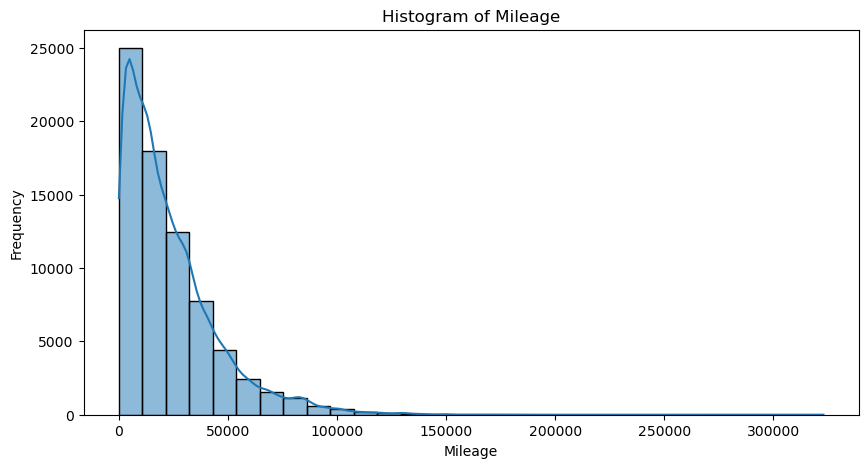

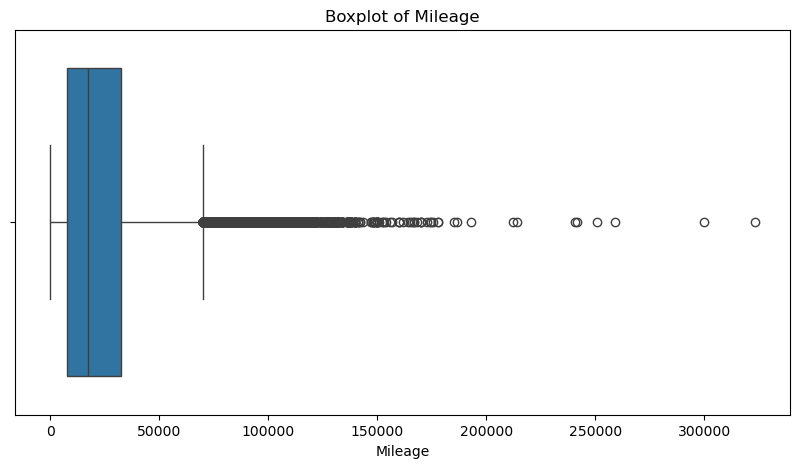

In [44]:
# Histogram
plt.figure(figsize=(10,5))
sns.histplot(df_train['mileage'], bins=30, kde=True) 
plt.title('Histogram of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(10,5))
sns.boxplot(x=df_train['mileage'])
plt.title('Boxplot of Mileage')
plt.xlabel('Mileage')
plt.show()

#### Mileage Observations
- Initial NaNs: 1,463.
- Floats rounded to integers; dtype converted to int.
- 369 negative mileage values detected - replaced with NaN.
- Final NaNs: 1,463.
- Most cars have low mileage, as most are recent models.
- Very few cars exceed 50,000 miles.
- Extreme outliers appear around ~70,000 miles.

## 2.6. Tax 

Cheking Nan Values.

In [45]:
df_train['tax'].isna().sum()

7904

Cheking Inconsistencies.

In [46]:
df_train['tax'].unique()

array([         nan, 145.        ,  30.        ,  20.        ,
       150.        , 160.        , -56.19320154,   0.        ,
       125.        , 200.        , 250.        , 135.        ,
       300.        , 205.        , 260.        , 326.02823317,
       325.        , -45.78061049, 265.        , 305.        ,
       303.14889146, 235.        , 299.47350391, 240.        ,
       165.        , 140.        , 540.        , 155.        ,
       220.        , 120.        , 330.        , 290.48678508,
       -20.24107949, -18.33074314, 327.91577835, 270.        ,
       115.        , 185.        , 316.48718937, 570.        ,
       -49.15354066, 316.29630636, -60.6840948 , 555.        ,
       277.38425448, -91.12163048,  10.        , 315.        ,
       190.        , -31.91494466, 230.        , -43.24208237,
       294.84340933, 195.        , 580.        , 290.        ,
       130.        , 565.        , 210.        , 280.        ,
       255.        , 520.        , 295.        , 245.  

We check for negative values in the 'tax' column, which are clearly errors. Additionally, decimal values do not make sense here, so we can round them to integers.

In [47]:
# Round the 'tax' values to the nearest integer.
df_train['tax'] = df_train['tax'].round()

In [48]:
# Convert the dtype to nullable integer (Int64) for consistency.
df_train['tax'] = df_train['tax'].astype('Int64')

In [49]:
df_train['tax'].unique()

<IntegerArray>
[<NA>,  145,   30,   20,  150,  160,  -56,    0,  125,  200,  250,  135,  300,
  205,  260,  326,  325,  -46,  265,  305,  303,  235,  299,  240,  165,  140,
  540,  155,  220,  120,  330,  290,  -20,  -18,  328,  270,  115,  185,  316,
  570,  -49,  -61,  555,  277,  -91,   10,  315,  190,  -32,  230,  -43,  295,
  195,  580,  130,  565,  210,  280,  255,  520,  245,  110,  535]
Length: 63, dtype: Int64

In [50]:
(df_train['tax'] < 0).sum()

378

There are 378 negative values in the tax column. Since they represent a small percentage of the dataset and we cannot confirm whether their absolute values are correct, we will replace them with NaN.

In [51]:
# Replace negative tax values with NaN.
df_train.loc[df_train['tax'] < 0, 'tax'] = pd.NA

In [52]:
# Final Number of Nan Values.
df_train['tax'].isna().sum()

8282

Visualizing the variable tax on a histogram and boxplot.

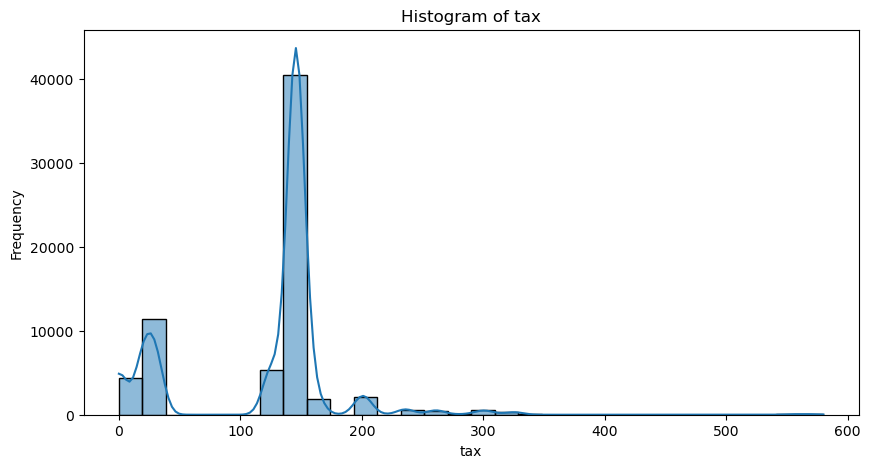

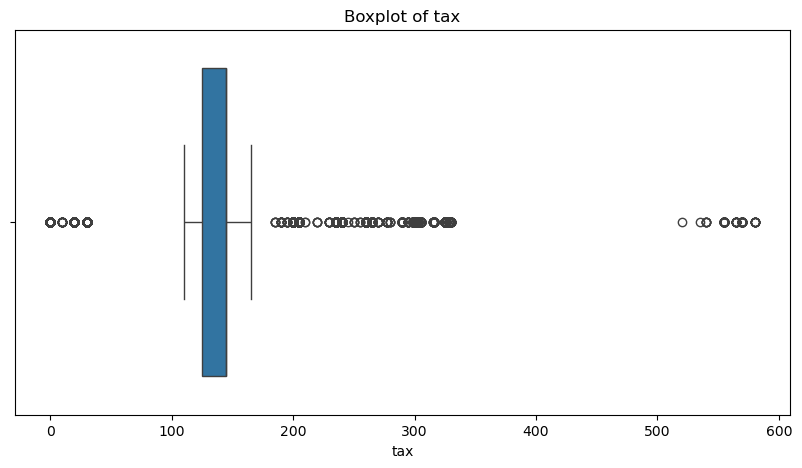

In [53]:
# Histogram.
plt.figure(figsize=(10,5))
sns.histplot(df_train['tax'], bins=30, kde=True) 
plt.title('Histogram of tax')
plt.xlabel('tax')
plt.ylabel('Frequency')
plt.show()

# Boxplot.
plt.figure(figsize=(10,5))
sns.boxplot(x=df_train['tax'])
plt.title('Boxplot of tax')
plt.xlabel('tax')
plt.show()

#### Tax Observations

- Initially 7,904 NaNs; after cleaning, 8,282 NaNs.
- Nonsensical float values converted to int.
- Negative values replaced with NaN.
- Most taxes between 120 and 160.
- Right-skewed distribution.
- Many high outliers; few low outliers.
- Majority of cars have moderate taxes.
- Some extreme values may need cleaning.

## 2.7. FuelType

Ckecking Nan values.

In [54]:
# Sum of all Nan values in fuelType variable.
df_train['fuelType'].isna().sum()

1511

Cheking Inconsistencies.

In [55]:
# Get unique values from the 'fuelType' column.
df_train['fuelType'].unique()

array(['Petrol', 'Diesel', 'etrol', 'Hybrid', 'diesel', 'iesel', nan,
       'petrol', 'PETROL', 'Diese', 'Petro', 'DIESEL', 'petro', 'HYBRID',
       'ybri', 'Other', 'DIESE', 'Hybri', 'ETROL', 'ybrid', 'PETRO',
       'hybrid', 'IESEL', 'Electric', 'ther', 'iese', 'etro', 'ETRO',
       'diese', 'Othe', 'YBRID', 'HYBRI', 'OTHER', 'other', 'IESE'],
      dtype=object)

In [56]:
# Get the unique values sorted alphabetically.
sorted(df_train['fuelType'].dropna().unique())

['DIESE',
 'DIESEL',
 'Diese',
 'Diesel',
 'ETRO',
 'ETROL',
 'Electric',
 'HYBRI',
 'HYBRID',
 'Hybri',
 'Hybrid',
 'IESE',
 'IESEL',
 'OTHER',
 'Othe',
 'Other',
 'PETRO',
 'PETROL',
 'Petro',
 'Petrol',
 'YBRID',
 'diese',
 'diesel',
 'etro',
 'etrol',
 'hybrid',
 'iese',
 'iesel',
 'other',
 'petro',
 'petrol',
 'ther',
 'ybri',
 'ybrid']

Similar to the variable ‘model’, we’ll convert all strings to uppercase to make the analysis easier.

In [57]:
# Convert all string values in the 'fuelType' column to uppercase.
# Non-string values (e.g., NaN) will remain unchanged.
df_train['fuelType'] = df_train['fuelType'].str.upper()

In [58]:
# Get the unique values sorted alphabetically and uppercase.
sorted(df_train['fuelType'].dropna().unique())

['DIESE',
 'DIESEL',
 'ELECTRIC',
 'ETRO',
 'ETROL',
 'HYBRI',
 'HYBRID',
 'IESE',
 'IESEL',
 'OTHE',
 'OTHER',
 'PETRO',
 'PETROL',
 'THER',
 'YBRI',
 'YBRID']

Now let’s correct the typing errors.

In [59]:
# Create a mapping dictionary to correct common typing errors in the 'fuelType' column.
corrections = {
    'DIESE': 'DIESEL',
    'IESE': 'DIESEL',
    'IESEL': 'DIESEL',
    'ETRO': 'PETROL',
    'ETROL': 'PETROL',
    'PETRO': 'PETROL',
    'HYBRI': 'HYBRID',
    'YBRI': 'HYBRID',
    'YBRID': 'HYBRID',
    'OTHE': 'OTHER',
    'THER': 'OTHER'
}

# Apply the corrections using the mapping.
df_train['fuelType'] = df_train['fuelType'].replace(corrections)

In [60]:
# Get the unique values sorted alphabetically and corrected.
sorted(df_train['fuelType'].dropna().unique())

['DIESEL', 'ELECTRIC', 'HYBRID', 'OTHER', 'PETROL']

Visualizing the fuel type on a countplot.

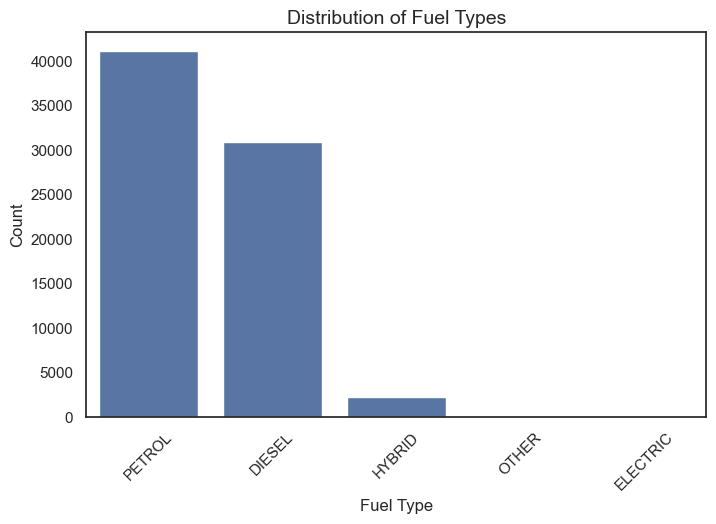

In [61]:
sns.set(style="white")

# Create a countplot to visualize the distribution of 'fuelType'.
plt.figure(figsize=(8, 5))  
sns.countplot(x='fuelType', data=df_train, order=df_train['fuelType'].value_counts().index)

# Add title and labels
plt.title('Distribution of Fuel Types', fontsize=14)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate x-axis labels.
plt.xticks(rotation=45)
plt.show()

#### FuelType Observations
- 1,511 missing values were found.
- Typing errors (e.g., missing letters) were identified and corrected.
- Petrol is the most common fuel type, followed by diesel.
- Only a very small portion of the dataset is hybrid or electric.

## 2.8. Mpg

Ckecking Nan values.

In [62]:
# Sum of all Nan values in mpg variable.
df_train['mpg'].isna().sum()

7926

Cheking Inconsistencies.

In [63]:
# Get unique values from the 'mpg' column.
df_train['mpg'].unique()

array([ 11.41726775,  47.9       ,  40.9       ,  65.7       ,
        42.8       ,  60.1       ,  68.9       ,  62.8       ,
        67.3       ,  54.3       ,  57.7       ,          nan,
        56.5       ,  72.4       ,  47.1       ,  44.1       ,
        46.3       ,  32.5       ,  48.7       ,  74.3       ,
        43.5       ,  78.5       ,  51.4       ,  50.4       ,
        67.        ,  28.5       ,  64.2       ,  61.4       ,
        41.5       ,  52.3       ,  53.3       ,  44.8       ,
        35.8       ,  80.7       ,  37.2       ,  49.6       ,
        42.2       ,  45.6       ,  34.        ,  74.4       ,
        29.1       ,  76.3       ,  40.3       ,  58.9       ,
        39.8       ,  55.4       ,  40.4       ,  78.4       ,
        83.1       ,  33.2       ,  34.5       ,  70.6       ,
        35.3       ,  39.2       ,  32.8       ,  34.9       ,
        61.7       ,  30.        , 156.9       ,  36.2       ,
        58.        ,  38.2       ,  69.        ,  37.7 

- No zero values, which would be impossible.-
- Most values like 11.4, 47.9, 40.9, 65.7, make sense.
- Some extremely high values (470.8, 256.8) or negative values (-43.42) are clearly errors or outliers.

For this variable, it makes sense to have decimal values, but we don’t need so many. We can round all values to just one decimal place.

In [64]:
# Round all values in the 'mpg' column to one decimal place
df_train['mpg'] = df_train['mpg'].round(1)

Checking negative values.

In [65]:
(df_train['mpg'] < 0).sum()

36

In [66]:
df_train[df_train['mpg'] < 0]

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
758,13396,bmw,X1,2019,25480,Semi-Auto,5163,PETROL,145,-43.4,2.0,86.0,1.0,0.0
2545,14934,bmw,3 SERIES,2019,29500,Automatic,3185,PETROL,145,-43.4,2.0,97.0,3.0,0.0
5156,14127,bmw,2 SERIES,2020,32450,Semi-Auto,1118,DIESEL,145,-43.4,2.0,37.0,1.0,0.0
6306,14420,bmw,2 SERIES,2015,17799,Automatic,38902,PETROL,260,-43.4,3.0,33.0,4.0,0.0
7454,12400,bmw,X5,2016,26995,Automatic,46126,DIESEL,200,-43.4,3.0,77.0,2.0,0.0
7577,14603,bmw,2 SERIES,2015,17541,Semi-Auto,26035,PETROL,165,-43.4,2.0,75.0,3.0,0.0
9800,11181,bmw,1 SERIES,2019,19298,Semi-Auto,10040,DIESEL,145,-43.4,2.0,70.0,3.0,0.0
10107,7781,bmw,3 SERIES,2017,14800,Manual,29968,DIESEL,30,-43.4,2.0,52.0,1.0,0.0
10381,9202,bmw,X1,2016,17000,Automatic,46968,DIESEL,125,-43.4,2.0,82.0,0.0,0.0
11235,10214,bmw,3 SERIES,2014,14500,Automatic,45140,DIESEL,125,-43.4,3.0,77.0,2.0,0.0


All these negative values are the same (-43.4) and belong to BMW cars with different engine sizes. It is highly unlikely that 1.5L or 2.0L engines from the same brand would achieve the same mpg as 3.0L engines. For this reason, it is safer to assume these values are errors and convert them to NaN rather than taking 43.4 as an absolute value.

In [67]:
# Set every mpg value less than 0 to NaN.
df_train.loc[df_train['mpg'] < 0, 'mpg'] = np.nan

In [68]:
# New number of Nan values in mpg variable.
df_train['mpg'].isna().sum()

7962

Visualizing the variable mpg on a histogram and boxplot.

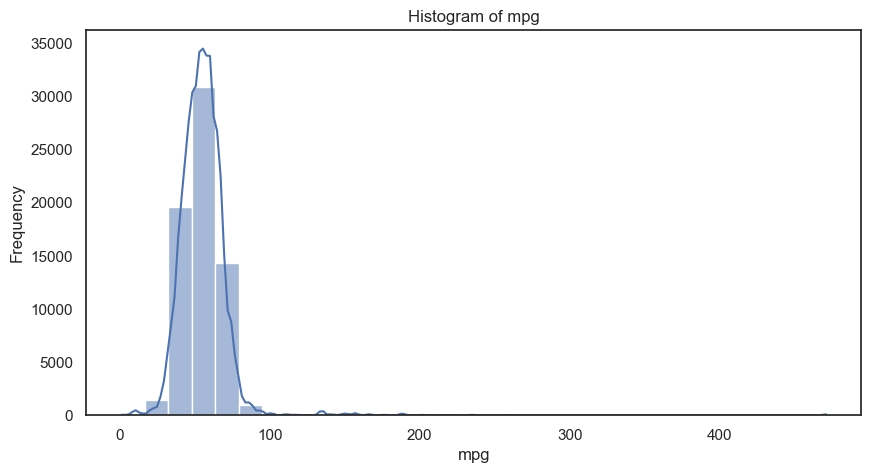

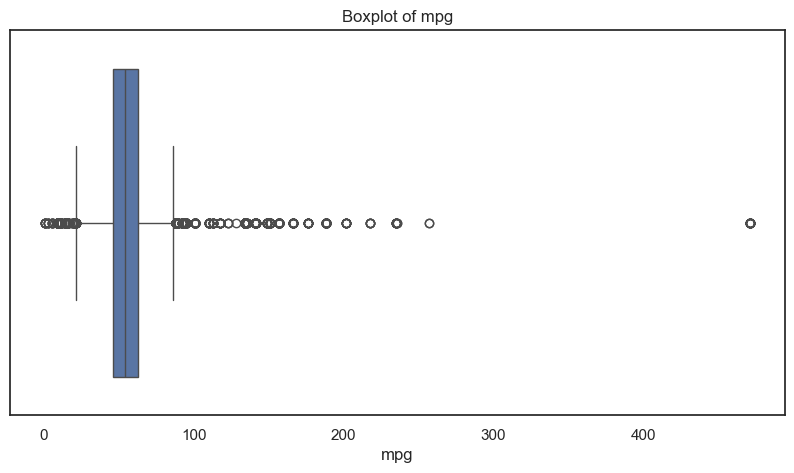

In [69]:
# Histogram.
plt.figure(figsize=(10,5))
sns.histplot(df_train['mpg'], bins=30, kde=True) 
plt.title('Histogram of mpg')
plt.xlabel('mpg')
plt.ylabel('Frequency')
plt.show()

# Boxplot.
plt.figure(figsize=(10,5))
sns.boxplot(x=df_train['mpg'])
plt.title('Boxplot of mpg')
plt.xlabel('mpg')
plt.show()

#### Mpg Observations

- Initial missing values: 7,926 NaN.
- Found very high outliers: 470.8, 256.8
- Found negative vales: -43.42. These were replaced with NaN.
- Updated missing values: 7,962 NaN.
- The Distribution: roughly normal, most values around 50 mpg.
- Outliers: Low (<20 mpg): realistic, consistent with real-world vehicles. High (>100 mpg): unusual, may be errors or rare cases.

## 2.9. EngineSize

Ckecking Nan values.

In [70]:
# Sum of all Nan values in engineSizeS variable.
df_train['engineSize'].isna().sum()

1516

Cheking Inconsistencies.

In [71]:
# Get unique values from the 'engineSize' column.
df_train['engineSize'].unique()

array([ 2.        ,  1.5       ,  1.        ,  1.4       ,  1.6       ,
               nan,  1.2       ,  3.        ,  1.8       ,  2.1       ,
        1.3       ,  0.7395339 ,  0.        ,  2.3       ,  1.1       ,
        4.        ,  1.7       ,  2.98579344,  2.2       ,  2.5       ,
        2.61964142, -0.1034928 ,  2.78177621,  2.63120047,  3.72371217,
        0.15452932,  4.2       ,  3.2       ,  2.9       ,  2.8       ,
        0.31340658,  2.06411863,  3.73923548,  2.4       ,  0.18642488,
        2.6631132 ,  5.2       ,  0.19146242,  5.        ,  0.30707394,
        0.37112737,  4.4       ,  6.2       ,  3.82275785,  1.9       ,
        0.6       ,  6.6       ,  5.5       ,  3.5       ,  4.7       ,
        0.16286595,  2.7       ,  3.6       ,  2.6       ,  4.3       ,
        5.4       ,  4.5       ,  4.1       ,  6.        ])

These very small engine sizes (0.154 L, 0.186 L, 0.191 L, 0.307 L) are unrealistic for cars from brands like VW, BMW, Mercedes, or Audi. They are likely errors caused by wrong units, misplaced decimals, or data entry mistakes.
Lso found zero and negative engine sizes that are not realistic for cars, so they should also be treated as errors.

It also doesn’t make sense to have some values with so many decimal places. Let’s round them all to just one decimal place.

In [72]:
# Rounding all values to just one decimal place.
df_train['engineSize'] = df_train['engineSize'].round(1)

In [73]:
sorted(df_train['engineSize'].dropna().unique())

[-0.1,
 0.0,
 0.2,
 0.3,
 0.4,
 0.6,
 0.7,
 1.0,
 1.1,
 1.2,
 1.3,
 1.4,
 1.5,
 1.6,
 1.7,
 1.8,
 1.9,
 2.0,
 2.1,
 2.2,
 2.3,
 2.4,
 2.5,
 2.6,
 2.7,
 2.8,
 2.9,
 3.0,
 3.2,
 3.5,
 3.6,
 3.7,
 3.8,
 4.0,
 4.1,
 4.2,
 4.3,
 4.4,
 4.5,
 4.7,
 5.0,
 5.2,
 5.4,
 5.5,
 6.0,
 6.2,
 6.6]

Anything smaller than 1.0 L or larger than 5.0 L is unrealistic for these car brands, and negative or zero values are also errors. Therefore, we will replace these values with NaN.

In [74]:
df_train.loc[(df_train['engineSize'] < 1.0) | (df_train['engineSize'] > 5.0), 'engineSize'] = np.nan

In [75]:
sorted(df_train['engineSize'].dropna().unique())

[1.0,
 1.1,
 1.2,
 1.3,
 1.4,
 1.5,
 1.6,
 1.7,
 1.8,
 1.9,
 2.0,
 2.1,
 2.2,
 2.3,
 2.4,
 2.5,
 2.6,
 2.7,
 2.8,
 2.9,
 3.0,
 3.2,
 3.5,
 3.6,
 3.7,
 3.8,
 4.0,
 4.1,
 4.2,
 4.3,
 4.4,
 4.5,
 4.7,
 5.0]

In [76]:
# Cheking final number of Nan Values.
df_train['engineSize'].isna().sum()

2161

Visualizing the variable engineSize on a histogram and boxplot.

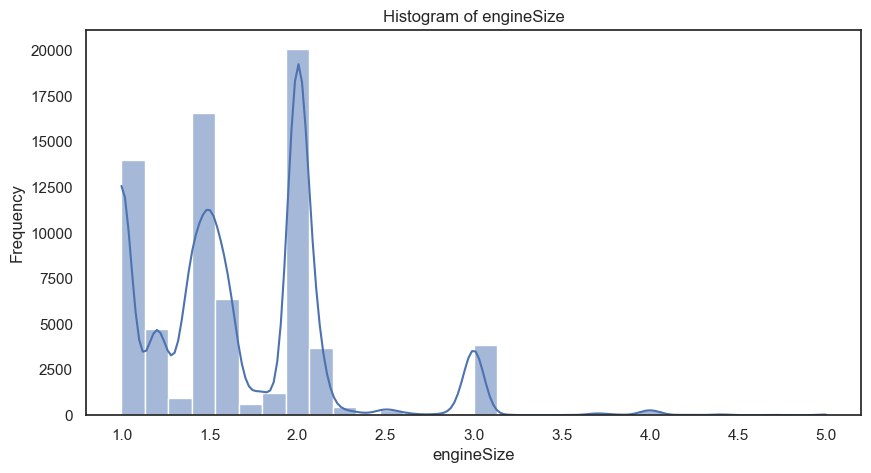

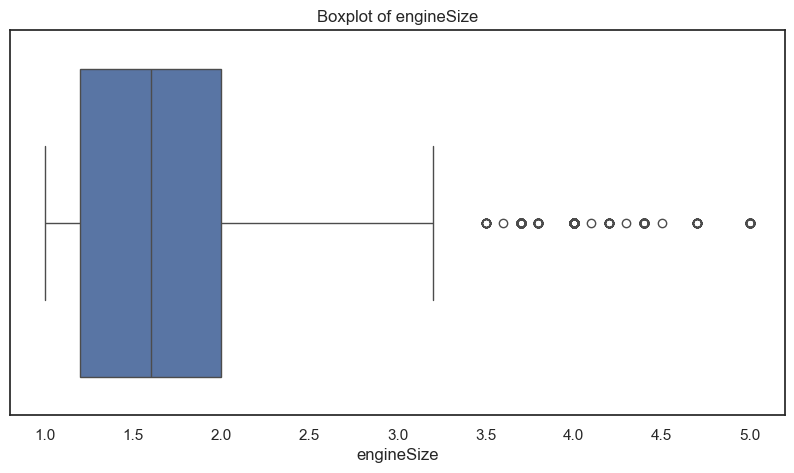

In [77]:
# Histogram.
plt.figure(figsize=(10,5))
sns.histplot(df_train['engineSize'], bins=30, kde=True) 
plt.title('Histogram of engineSize')
plt.xlabel('engineSize')
plt.ylabel('Frequency')
plt.show()

# Boxplot.
plt.figure(figsize=(10,5))
sns.boxplot(x=df_train['engineSize'])
plt.title('Boxplot of engineSize')
plt.xlabel('engineSize')
plt.show()

#### EngineSize Observations 

- Initially, 1,516 NaN values were present in the engineSize column.
- We identified unrealistic engine sizes for the car brands in the dataset, as well as negative and zero values.
- Unrealistic values (below 1.0 L or above 5.0 L) were replaced with NaN.
- The final number of NaN values is 2,161.
- The distribution of engineSize appears bimodal, with major peaks at 1.0 L, 1.5 L, and 2.0 L.
- The most common engine size is 2.0 L.
- Values above 3.5 L are considered outliers, representing rarer car models.
- These high engine sizes are assumed valid, although some may be data entry errors.

## 2.10. PreviousOwners

Ckecking Nan values.

In [78]:
# Sum of all Nan values in previousOwners variable.
df_train['previousOwners'].isna().sum()

1550

Cheking Inconsistencies.

In [79]:
# Get unique values from the 'previousOwners' column.
df_train['previousOwners'].unique()

array([ 4.        ,  1.        , -2.34030622,  3.        ,  0.        ,
        2.        ,         nan, -2.34565   ,  6.25837066, -2.33512284,
        6.22789796,  6.25823052,  6.23017958, -2.33936045,  6.21772443,
        6.24583495, -2.29943868, -2.34010209, -2.31225953,  6.2482512 ,
       -2.31733109,  6.23308217,  6.24177863, -2.33744529])

- It doesn’t make sense for the number of previous owners to be a float.
- We need to round values to the nearest integer and change the dtype to Int64.
- Negative numbers of previous owners also don’t make sense.
- 0 previous ownres can make sense since the car can be totally new.

In [80]:
# Round to nearest integer.
df_train['previousOwners'] = df_train['previousOwners'].round(0)

In [81]:
df_train['previousOwners'].unique()

array([ 4.,  1., -2.,  3.,  0.,  2., nan,  6.])

In [82]:
# Checking the negatve number of previous owners.
(df_train['previousOwners'] < 0).sum()

371

In [83]:
# Replace negative values with NaN.
df_train['previousOwners'] = df_train['previousOwners'].apply(lambda x: np.nan if x < 0 else x)

In [84]:
df_train['previousOwners'].unique()

array([ 4.,  1., nan,  3.,  0.,  2.,  6.])

Fixing dtype from float to Int64

In [85]:
# Convert the column to integer type (Int64 allows NaN values).
df_train['previousOwners'] = df_train['previousOwners'].astype('Int64')

In [86]:
# Cheking final number of Nan Values.
df_train['previousOwners'].isna().sum()

1921

Visualizing the variable engineSize on a histogram and boxplot.

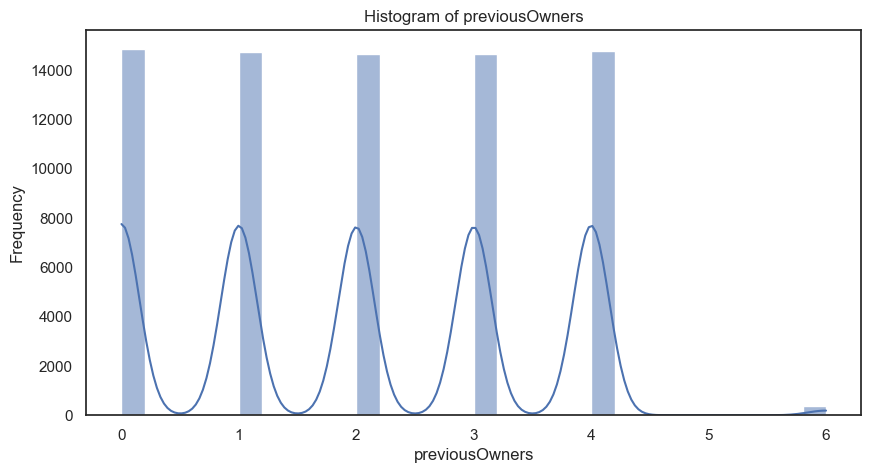

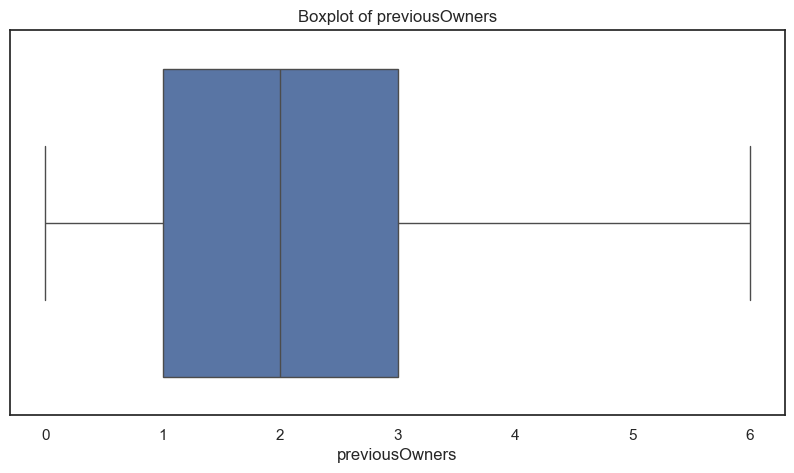

In [87]:
# Histogram.
plt.figure(figsize=(10,5))
sns.histplot(df_train['previousOwners'], bins=30, kde=True) 
plt.title('Histogram of previousOwners')
plt.xlabel('previousOwners')
plt.ylabel('Frequency')
plt.show()

# Boxplot.
plt.figure(figsize=(10,5))
sns.boxplot(x=df_train['previousOwners'])
plt.title('Boxplot of previousOwners')
plt.xlabel('previousOwners')
plt.show()

Visualizing the variable engineSize in a countplot.

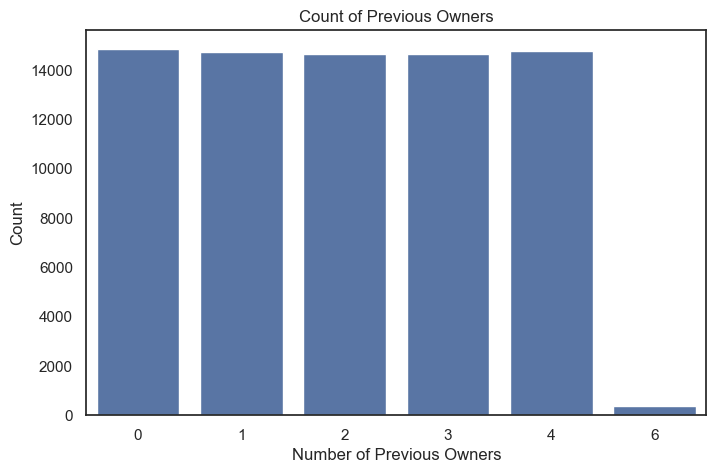

In [88]:
# Plot countplot
plt.figure(figsize=(8, 5))
sns.countplot(x='previousOwners', data=df_train)
plt.title('Count of Previous Owners')
plt.xlabel('Number of Previous Owners')
plt.ylabel('Count')
plt.show()

#### PreviousOwners Observations

- Initially, previousOwners had 1,550 NaN values.
- Negative values were found, which are impossible, so they were replaced with NaN.
- The new total of NaN values is 1,921.
- The data type was changed from float to Int64.
- No outliers were detected; all values appear realistic.
- Most cars have 0, 1, 2, 3, or 4 previous owners, well distributed.
- Very few cars have 6 previous owners.

## 2.11. HasDamage

Ckecking Nan values.

In [89]:
# Sum of all Nan values in hasDamage variable.
df_train['hasDamage'].isna().sum()

1548

1548 cars don't have damage or this number also represent missing data?

Cheking Inconsistencies.

In [90]:
# Get unique values from the 'hasDamage' column.
df_train['hasDamage'].unique()

array([ 0., nan])

- The hasDamage column is currently a float.
- 0 indicates the car has damage.
- NaN indicates the car has no damage.
- We need to convert hasDamage to a boolean type: 0 - True (has damage); NaN - False (no damage).

Converting hasDamage to a boolean type, treating 0 as True (has damage) and NaN as False (no damage).

In [91]:
# Convert hasDamage: 0 → True (has damage), NaN → False (no damage)
df_train['hasDamage'] = df_train['hasDamage'].apply(lambda x: True if x == 0. else False)

# Ensure dtype is boolean
df_train['hasDamage'] = df_train['hasDamage'].astype(bool)

In [92]:
df_train.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,vw,GOLF,2016,22290,Semi-Auto,28421,PETROL,<NA>,11.4,2.0,63.0,4,True
1,53000,toyota,YARIS,2019,13790,Manual,4589,PETROL,145,47.9,1.5,50.0,1,True
2,6366,audi,Q2,2019,24990,Semi-Auto,3624,PETROL,145,40.9,1.5,56.0,4,True
3,29021,ford,FIESTA,2018,12500,anual,9102,PETROL,145,65.7,1.0,50.0,<NA>,True
4,10062,bmw,2 SERIES,2019,22995,Manual,1000,PETROL,145,42.8,1.5,97.0,3,True


In [93]:
# Cheking how many cars dont have damage.
df_train[df_train['hasDamage'] == False].shape[0]

1548

In [94]:
# Checking 'hasDamage' dtype.
df_train['hasDamage'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 75973 entries, 0 to 75972
Series name: hasDamage
Non-Null Count  Dtype
--------------  -----
75973 non-null  bool 
dtypes: bool(1)
memory usage: 74.3 KB


In [95]:
# Confirm the new number of Nan Values.
df_train['hasDamage'].isna().sum()

0

Visualizing 'hasDamage' on a pie chart.

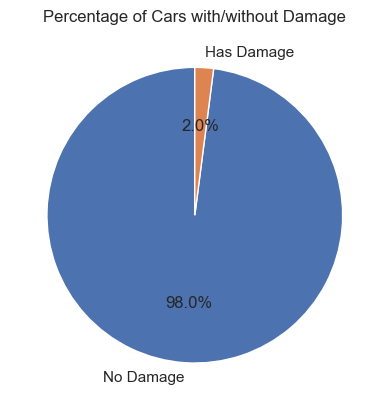

In [96]:
df_train['hasDamage'].value_counts(normalize=True).plot.pie(
    autopct='%1.1f%%', labels=['No Damage', 'Has Damage'], startangle=90
)
plt.title('Percentage of Cars with/without Damage')
plt.ylabel('')
plt.show()

#### HasDemage Observations
- Initially, the hasDamage column had 1548 NaN values.
- The column only contained 0 or NaN.
- 0 was interpreted as True (car has damage) and NaN as False (no damage).
- The dtype was converted to boolean.
- After conversion, there are 0 NaN values remaining.
- Only 2% of cars have no damage, while 98% of cars have some type of damage.

## 2.12. Price

Ckecking Nan values.

In [97]:
# Sum of all Nan values of price variable.
df_train['price'].isna().sum()

0

Cheking Inconsistencies.

In [98]:
df_train['price'].head(30)

0     22290
1     13790
2     24990
3     12500
4     22995
5      8199
6     16089
7      7500
8     15999
9     15300
10    11998
11    24109
12    17799
13    13295
14    13990
15    19491
16     6990
17    19995
18    18997
19    28995
20     7500
21    31299
22     8995
23    45995
24    12299
25    26176
26    11295
27    57895
28     6750
29    17990
Name: price, dtype: int64

Checking the statitics.

In [99]:
df_train['price'].describe()

count     75973.000000
mean      16881.889553
std        9736.926322
min         450.000000
25%       10200.000000
50%       14699.000000
75%       20950.000000
max      159999.000000
Name: price, dtype: float64

Visualizing 'price' on a histogram and boxplot.

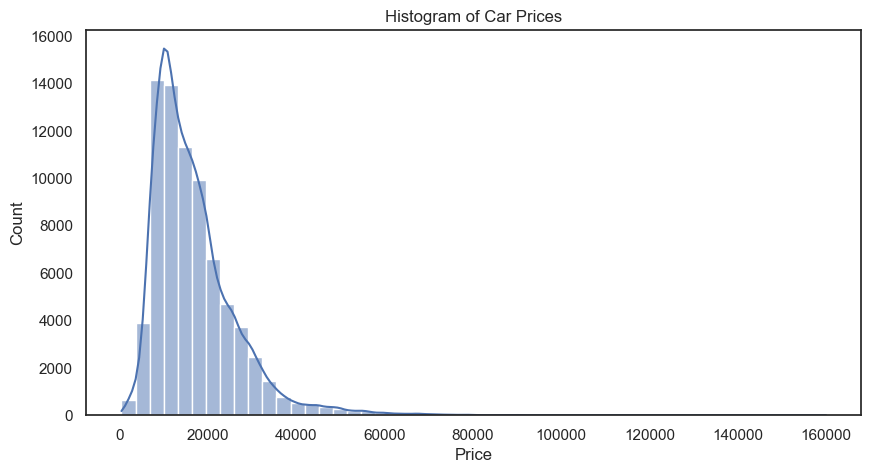

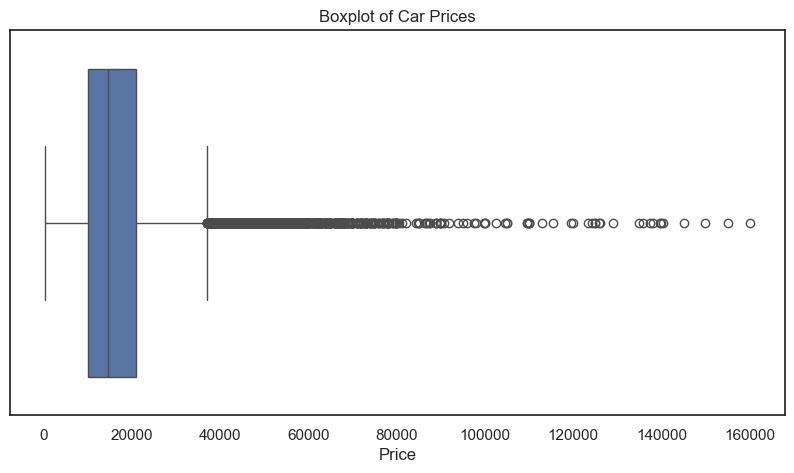

In [100]:
# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df_train['price'], bins=50, kde=True)
plt.title('Histogram of Car Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

# Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_train['price'])
plt.title('Boxplot of Car Prices')
plt.xlabel('Price')
plt.show()

#### Price Observations
- No missing values or inconsistencies were found.
- Prices range from 450 to 159,999 dolars, with a mean of ~16,882 dolars and median of 14,699 dolars.
- The distribution is roughly normal, peaking around 20,000 dolars.
- Outliers above 40,000 dolars exist but are realistic, reflecting rarer or more expensive car models.
- Overall, the prices appear plausible and consistent with the dataset.

## 2.13. Transmission

Checking Nan values.

In [101]:
# Sum of all Nan values of transmission variable.
df_train['transmission'].isna().sum()

1522

Checking Inconsistencies.

In [102]:
df_train['transmission'].unique()

array(['Semi-Auto', 'Manual', 'anual', 'Semi-Aut', 'Automatic', 'manual',
       nan, 'unknown', 'Manua', 'AUTOMATIC', 'MANUAL', 'semi-auto',
       ' Manual ', 'automatic', 'emi-Auto', 'SEMI-AUTO', 'SEMI-AUT',
       'Automati', 'ANUAL', 'utomatic', 'unknow', 'EMI-AUTO', 'manua',
       'anua', 'emi-Aut', 'MANUA', 'emi-auto', 'UTOMATIC', ' manual ',
       ' MANUAL ', 'UNKNOWN', 'nknown', 'automati', 'Other', 'semi-aut',
       ' Manual', 'AUTOMATI', 'utomati', 'Manual ', 'manual ', 'nknow'],
      dtype=object)

Several typing errors were found—missing letters, inconsistent capitalization, etc. We will remove extra spaces and convert everything to uppercase.

In [103]:
# Remove leading/trailing spaces and uppercase all entries.
df_train['transmission'] = df_train['transmission'].str.strip().str.upper()

In [104]:
# Cheking all unique values after removing spaces and uppercase.
sorted(df_train['transmission'].dropna().astype(str).unique())

['ANUA',
 'ANUAL',
 'AUTOMATI',
 'AUTOMATIC',
 'EMI-AUT',
 'EMI-AUTO',
 'MANUA',
 'MANUAL',
 'NKNOW',
 'NKNOWN',
 'OTHER',
 'SEMI-AUT',
 'SEMI-AUTO',
 'UNKNOW',
 'UNKNOWN',
 'UTOMATI',
 'UTOMATIC']

In [105]:
# Create a dictionary to fix common typos in the 'transmission' column.
transmission_mapping = {
    'ANUA': 'MANUAL',
    'ANUAL': 'MANUAL',
    'AUTOMATI': 'AUTOMATIC',
    'EMI-AUT': 'SEMI-AUTO',
    'EMI-AUTO': 'SEMI-AUTO',
    'MANUA': 'MANUAL',
    'NKNOW': 'UNKNOWN',
    'NKNOWN': 'UNKNOWN',
    'SEMI-AUT': 'SEMI-AUTO',
    'UNKNOW': 'UNKNOWN',
    'UTOMATI': 'AUTOMATIC',
    'UTOMATIC': 'AUTOMATIC'
}


# Apply the mapping to the 'transmission' column.
df_train['transmission'] = df_train['transmission'].replace(transmission_mapping)

In [106]:
# Cheking all unique values after removing spaces and uppercase.
sorted(df_train['transmission'].dropna().astype(str).unique())

['AUTOMATIC', 'MANUAL', 'OTHER', 'SEMI-AUTO', 'UNKNOWN']

'UNKNOWN' doesn’t give meaningful information about the transmission type. Treating it as NaN allows to handle it consistently with other missing values.

In [107]:
# Replace all 'UNKNOWN' values in the 'transmission' column with NaN
df_train['transmission'] = df_train['transmission'].replace('UNKNOWN', np.nan)

In [108]:
# Checking the new number of Nan values.
df_train['transmission'].isna().sum()

2258

Visualizing 'transmission' on a countplot.

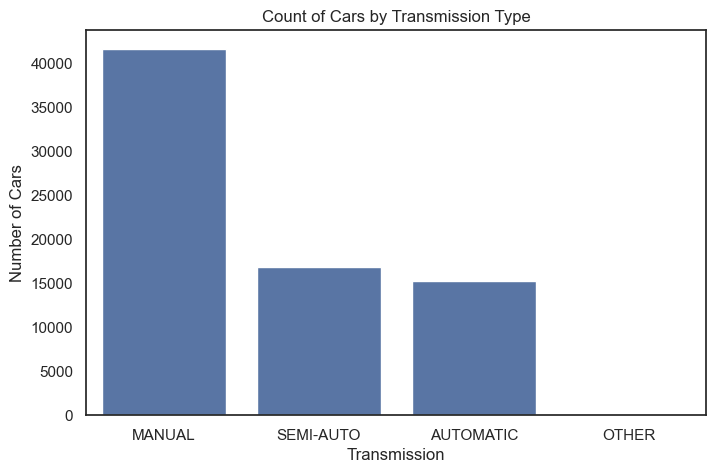

In [109]:
# Plot countplot of transmission types
plt.figure(figsize=(8,5))
sns.countplot(data=df_train, x='transmission', order=df_train['transmission'].value_counts().index)
plt.title('Count of Cars by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Number of Cars')
plt.show()

In [110]:
# Cheking the number of cars with 'OTHER' transmission
df_train[df_train['transmission'] == 'OTHER'].shape[0]

5

#### Transmission Observations
- Initially found 1,522 missing values.
- Typing errors were corrected and extra spaces removed.
- Final number of NaN values: 2,258.
- Entries with 'unknow' were converted to NaN.
- Most cars have Manual transmission, followed by Semi-Auto and Automatic.
- Only 5 cars have Other transmission types.

## 2.14. PaintQuality%

Checking Nan values.

In [111]:
# Check NaN values for paintQuality# column.
df_train['paintQuality%'].isna().sum()

1524

Checking Inconsistencies.

In [112]:
df_train['paintQuality%'].unique()

array([ 63.        ,  50.        ,  56.        ,  97.        ,
        74.        ,  75.        ,  59.        ,  85.        ,
        35.        ,  68.        ,  45.        ,  30.        ,
        69.        ,  53.        ,  57.        ,  40.        ,
        60.        ,  94.        ,  33.        ,  51.        ,
        47.        ,  87.        ,  61.        ,  83.        ,
        95.        ,  46.        ,  54.        ,  80.        ,
        77.        ,  90.        ,  91.        ,  71.        ,
        44.        ,  38.        ,  64.        ,  55.        ,
        66.        ,  82.        ,  41.        ,  81.        ,
        79.        ,  72.        ,  34.        ,  88.        ,
                nan,  43.        ,  31.        ,  32.        ,
        96.        ,  84.        ,  70.        ,  86.        ,
        92.        ,  52.        ,  39.        ,  42.        ,
        73.        ,  78.        ,  37.        ,  65.        ,
        93.        ,  89.        ,  99.        ,  36.  

- Most values are between 30% and 99%, which seem realistic.
- There are some extreme outliers (~125% and ~1–3%) that are likely data errors. 
- It also doesn't make sense that some values have many decimal places while others have none. We will round all values to the nearest integer and then convert the column to Int64.

In [120]:
# Replace paintQuality% values above or equal to 3 and greater than 100 with NaN.
df_train.loc[(df_train['paintQuality%'] <= 3) | (df_train['paintQuality%'] > 100), 'paintQuality%'] = np.nan

In [121]:
# Round all remaining values to the nearest integer.
df_train['paintQuality%'] = df_train['paintQuality%'].round()

In [122]:
# Convert the column dtype to Int64 to handle integers with NaN values.
df_train['paintQuality%'] = df_train['paintQuality%'].astype('Int64')

In [123]:
df_train['paintQuality%'].unique()

<IntegerArray>
[  63,   50,   56,   97,   74,   75,   59,   85,   35,   68,   45,   30,   69,
   53,   57,   40,   60,   94,   33,   51,   47,   87,   61,   83,   95,   46,
   54,   80,   77,   90,   91,   71,   44,   38,   64,   55,   66,   82,   41,
   81,   79,   72,   34,   88, <NA>,   43,   31,   32,   96,   84,   70,   86,
   92,   52,   39,   42,   73,   78,   37,   65,   93,   89,   99,   36,   62,
   67,   76,   48,   49,   98,   58]
Length: 71, dtype: Int64

In [124]:
# Check NaN values again.
df_train['paintQuality%'].isna().sum()

2250

Visualizing 'paintQuality%' on a histogram and boxplot.

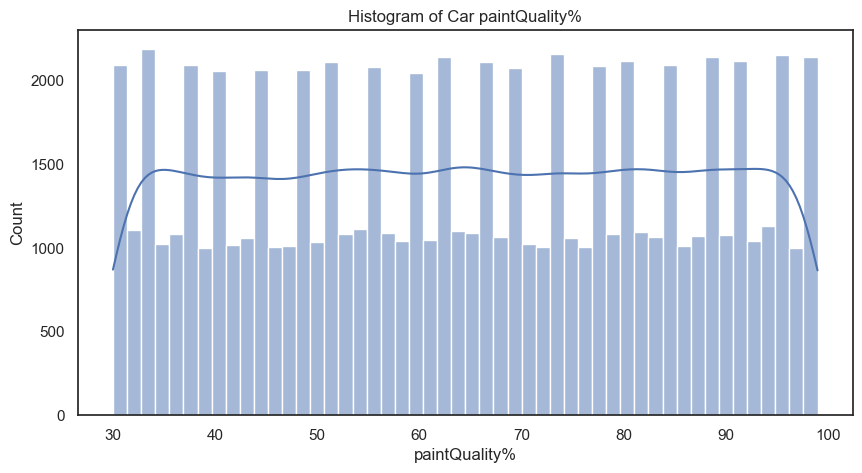

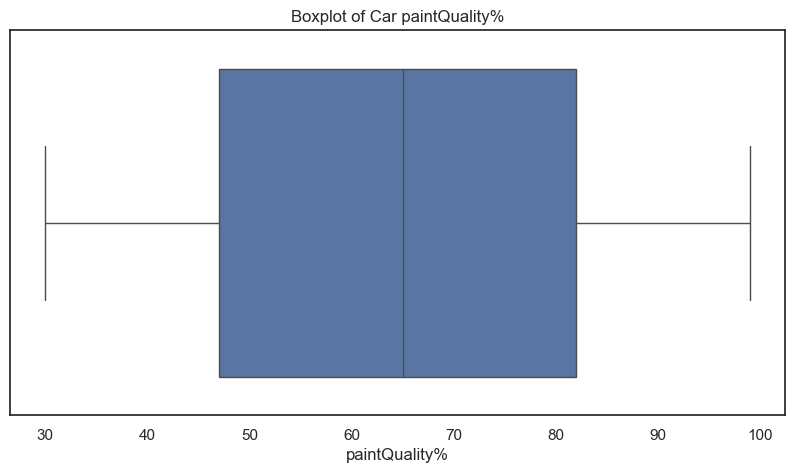

In [125]:
# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df_train['paintQuality%'], bins=50, kde=True)
plt.title('Histogram of Car paintQuality%')
plt.xlabel('paintQuality%')
plt.ylabel('Count')
plt.show()

# Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_train['paintQuality%'])
plt.title('Boxplot of Car paintQuality%')
plt.xlabel('paintQuality%')
plt.show()

#### PaintQuality% Observations
- Initially, 1,524 NaN values were detected.
- Extreme outliers (1–3% and 125%) were considered errors and replaced with NaN.
- Some values had many decimals, so all were rounded to the nearest integer and dtype changed from float to Int64.
- Final number of NaNs: 2,250.
- After cleaning, the histogram and boxplot show a well-distributed variable with no outliers.

# 3. Multivariate Analysis

In [126]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74264 non-null  object 
 3   year            74482 non-null  Int64  
 4   price           75973 non-null  int64  
 5   transmission    73715 non-null  object 
 6   mileage         74141 non-null  Int64  
 7   fuelType        74462 non-null  object 
 8   tax             67691 non-null  Int64  
 9   mpg             68011 non-null  float64
 10  engineSize      73812 non-null  float64
 11  paintQuality%   73723 non-null  Int64  
 12  previousOwners  74052 non-null  Int64  
 13  hasDamage       75973 non-null  bool   
dtypes: Int64(5), bool(1), float64(2), int64(2), object(4)
memory usage: 8.0+ MB


#### Price by Transmission Type

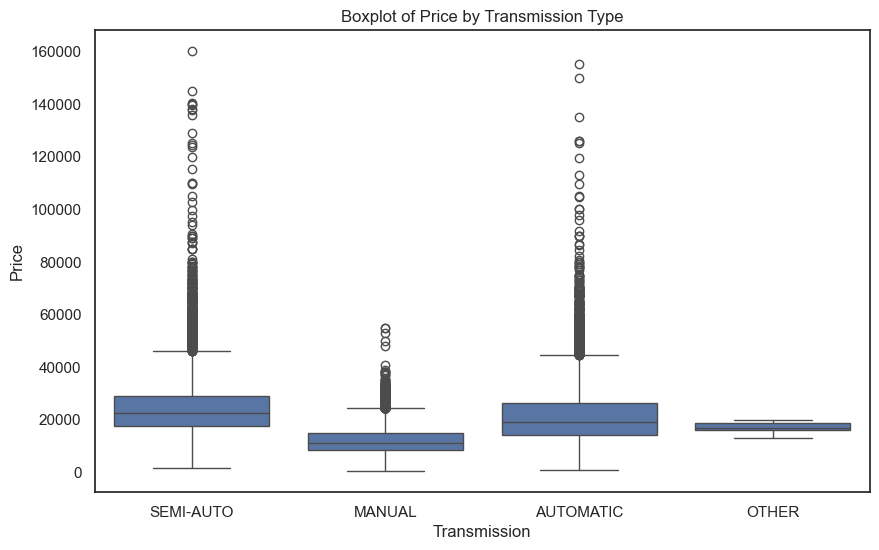

In [130]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission', y='price', data=df_train)
plt.title("Boxplot of Price by Transmission Type")
plt.xlabel("Transmission")
plt.ylabel("Price")
plt.show()

- Manual cars are cheaper than Semi-Auto and Automatic in geral.
- Semi-Auto and Automatic cars can reach very high prices, up to 150,000, while Manual cars rarely exceed 60,000.

#### Price by Brand

Brand
mercedes    24472.962052
audi        22883.134936
bmw         22657.122565
vw          16862.678093
skoda       14242.607251
hyundai     12811.599581
ford        12581.911909
toyota      12480.692774
opel        10367.619547
Name: price, dtype: float64


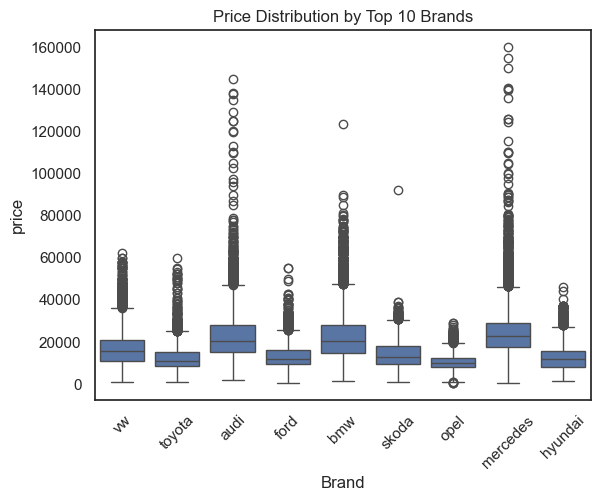

In [149]:
# Average price per brand
brand_price = df_train.groupby('Brand')['price'].mean().sort_values(ascending=False)
print(brand_price.head(10))

# Boxplot of price by brand (top 10 brands by count)
top_brands = df_train['Brand'].value_counts().head(10).index
sns.boxplot(x='Brand', y='price', data=df_train[df_train['Brand'].isin(top_brands)])
plt.title('Price Distribution by Top 10 Brands')
plt.xticks(rotation=45)
plt.show()

#### Price by Model Analysis

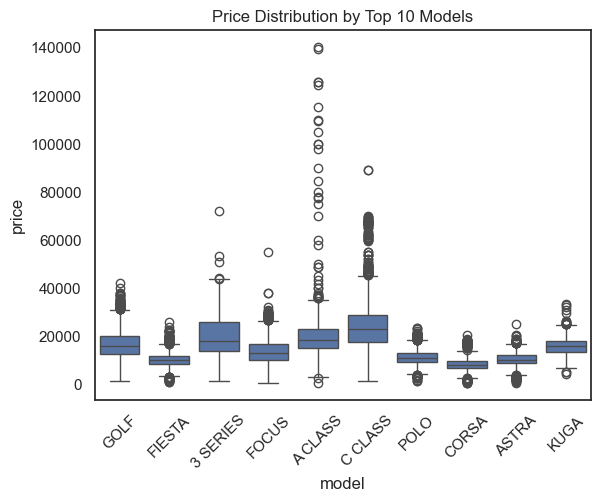

In [136]:
# Boxplot of price for the most common models
top_models = df_train['model'].value_counts().head(10).index
sns.boxplot(x='model', y='price', data=df_train[df_train['model'].isin(top_models)])
plt.title('Price Distribution by Top 10 Models')
plt.xticks(rotation=45)
plt.show()

#### Mileage & Price

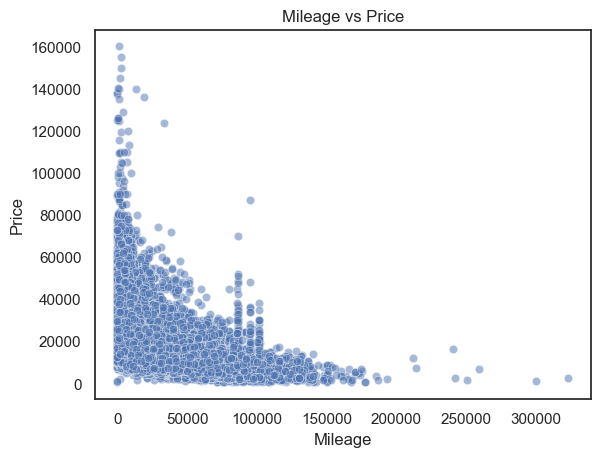

In [137]:
sns.scatterplot(x='mileage', y='price', data=df_train, alpha=0.5)
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

- As expected, higher mileage generally corresponds to lower prices.
- There are some expensive cars with high mileage and some low-priced cars with low mileage, likely due to rare or older models.

#### Year & Price

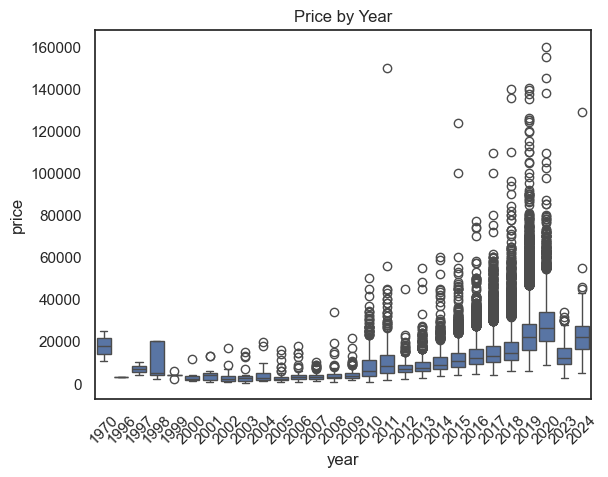

In [140]:
sns.boxplot(x='year', y='price', data=df_train)
plt.title('Price by Year')
plt.xticks(rotation=45)
plt.show()

#### Price distribution by fuel type

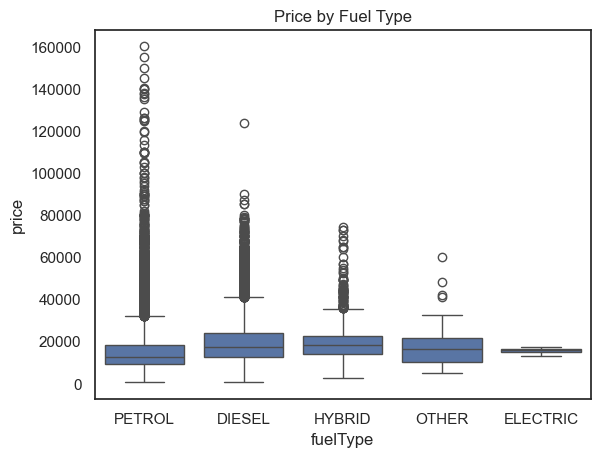

In [141]:
# Price distribution by fuel type
sns.boxplot(x='fuelType', y='price', data=df_train)
plt.title('Price by Fuel Type')
plt.show()

#### Engine Size & Price

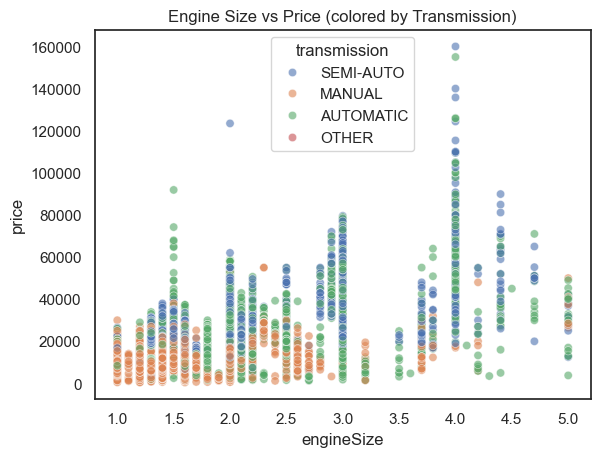

In [143]:
sns.scatterplot(x='engineSize', y='price', hue='transmission', data=df_train, alpha=0.6)
plt.title('Engine Size vs Price (colored by Transmission)')
plt.show()

#### Previous Owners & Price

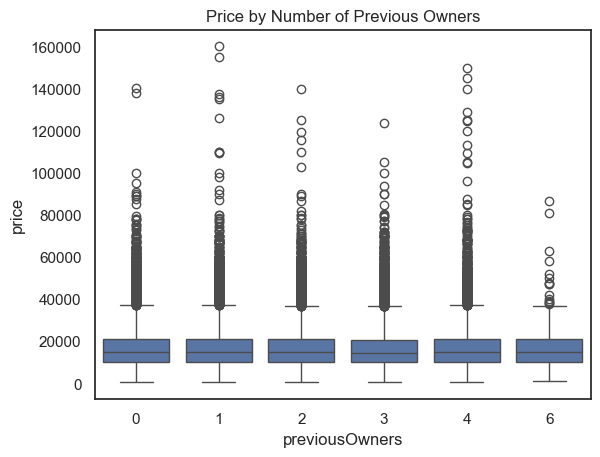

In [146]:
sns.boxplot(x='previousOwners', y='price', data=df_train)
plt.title('Price by Number of Previous Owners')
plt.show()

#### Damage & Price

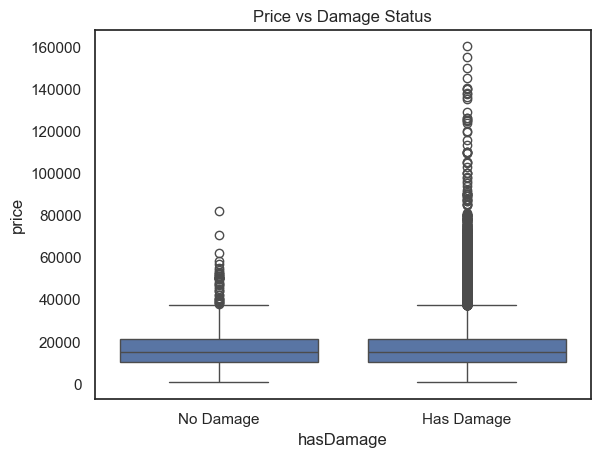

In [147]:
sns.boxplot(x='hasDamage', y='price', data=df_train)
plt.title('Price vs Damage Status')
plt.xticks([0,1], ['No Damage','Has Damage'])
plt.show()

#### Correlation Matrix for Numeric Variables

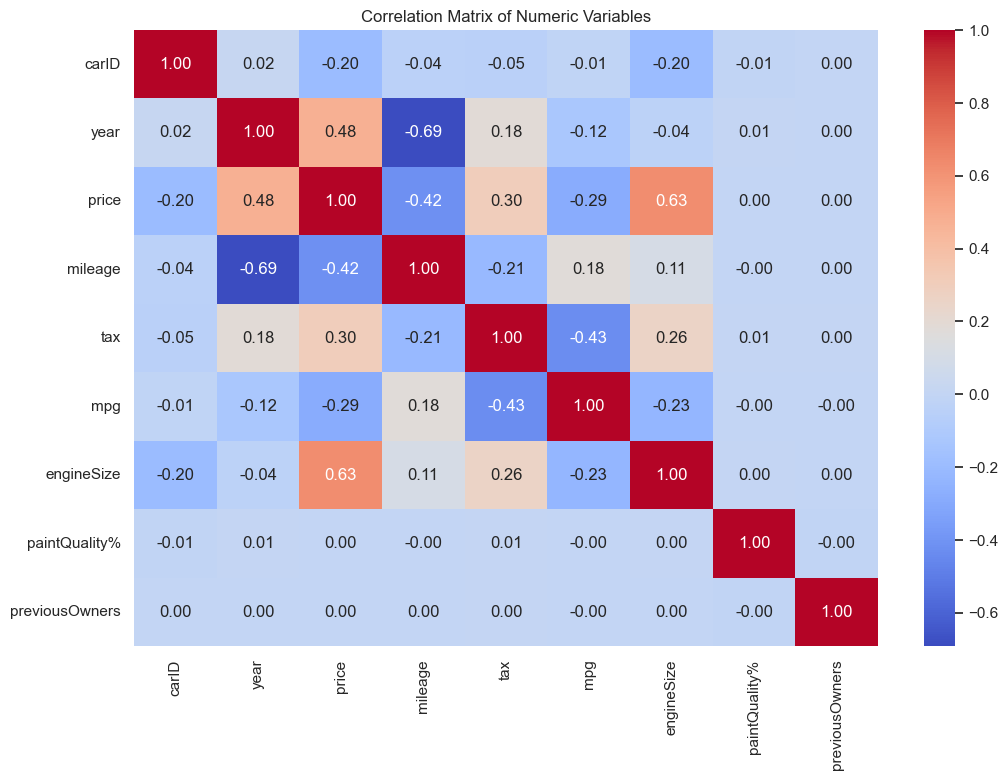

In [127]:
# Select only numeric columns
numeric_cols = df_train.select_dtypes(include=['int64', 'Int64', 'float64']).columns

# Compute correlation matrix
corr_matrix = df_train[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Variables")
plt.show()